# Heat-exchanger data analysis and engineering calcs (Cristian Merli, UniTn id: 211384)

## Environment setup and parameters

### - General software info

* Useful links:

https://code.visualstudio.com/docs/datascience/data-science-tutorial

* SW header:

In [24]:
__author__ = "Cristian Merli"
__copyright__ = "Copyright 2021, The Cogent Project"
__credits__ = ["Cristian Merli", "Ing. Maurizio Grigiante"]
__license__ = "GPL"
__version__ = "0.0.1"
__maintainer__ = "Cristian Merli"
__email__ = "cristian.merli@studenti.unitn.it"
__status__ = "Draft"

### - Clear envirnoment

* Clear JupyterNotebook environment and set python files auto-reload

In [25]:
%reset -f
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### - Libraries import

* Import project personal libraries

In [26]:
from libs import plotting_lib as pl           # Plotting lib
from libs import data_analysis_lib as da      # Data analysis lib
from libs import thermophys_vars_lib as tv    # Thermophysics variables lib
from libs import eng_calcs_lib as ec          # Engineering calcs lib

### - Load personalized plotting style

* Load personalized plotting style calling dedicated initialization function

In [27]:
pl.init_plt_style()   # Function call to load and init personalized plotting style

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


### - Flags and parameters

* Plotting flags

In [28]:
measures_plt_flg = True           # Measures plotting flag (set to True in order to plot)
sc_win_plt_flg = True             # Steady-conditions data windows plotting flag (set to True in order to plot)
thermophys_vars_plt_flg = True    # Thermophysics variables plotting flag (set to True in order to plot)

* Debug flags

In [29]:
measures_dbg_flg = True     # Measures debug flag (set to True in order to plot)
sc_win_dbg_flg = True       # Find steady-conditions data-windows debug flag (set to True in order to consult output)
mean_vals_dbg_flg = True    # Measures mean vals debug flag (set to True in order to consult output)
he_dbg_flg = True           # Heat-exchanger properties debug flag (set to True in order to consult output)
## LAST ##
meas_calcs_dbg_flg = True   # Measures and calcs results debug flag (set to True in order to consult output)

* Parameters

In [30]:
sc_win_span = 90    # Steady-conditions data-windows span (in samples)

## Heat-exchanger data analysis

### - Data import, extraction and filtering

* Import dataset's data from formatted (.csv) file, creating a new 'DataFrame' variable --> Source: Lab-data taken the 26th Nov 2021, group number 5 (original file name: scambiatore26112021_5.dat)

In [31]:
he_data = da.load_dataset_data()    # Function call to format dataset and import data from (.csv) file, creating a new panda DataFrame variable

* Find different measures data and different measures delimiter-indexes in dataset 'DataFrame'

--> Measures-delimiting indexes:  [195, 402, 430, 629, 689, 912, 939, 1197]


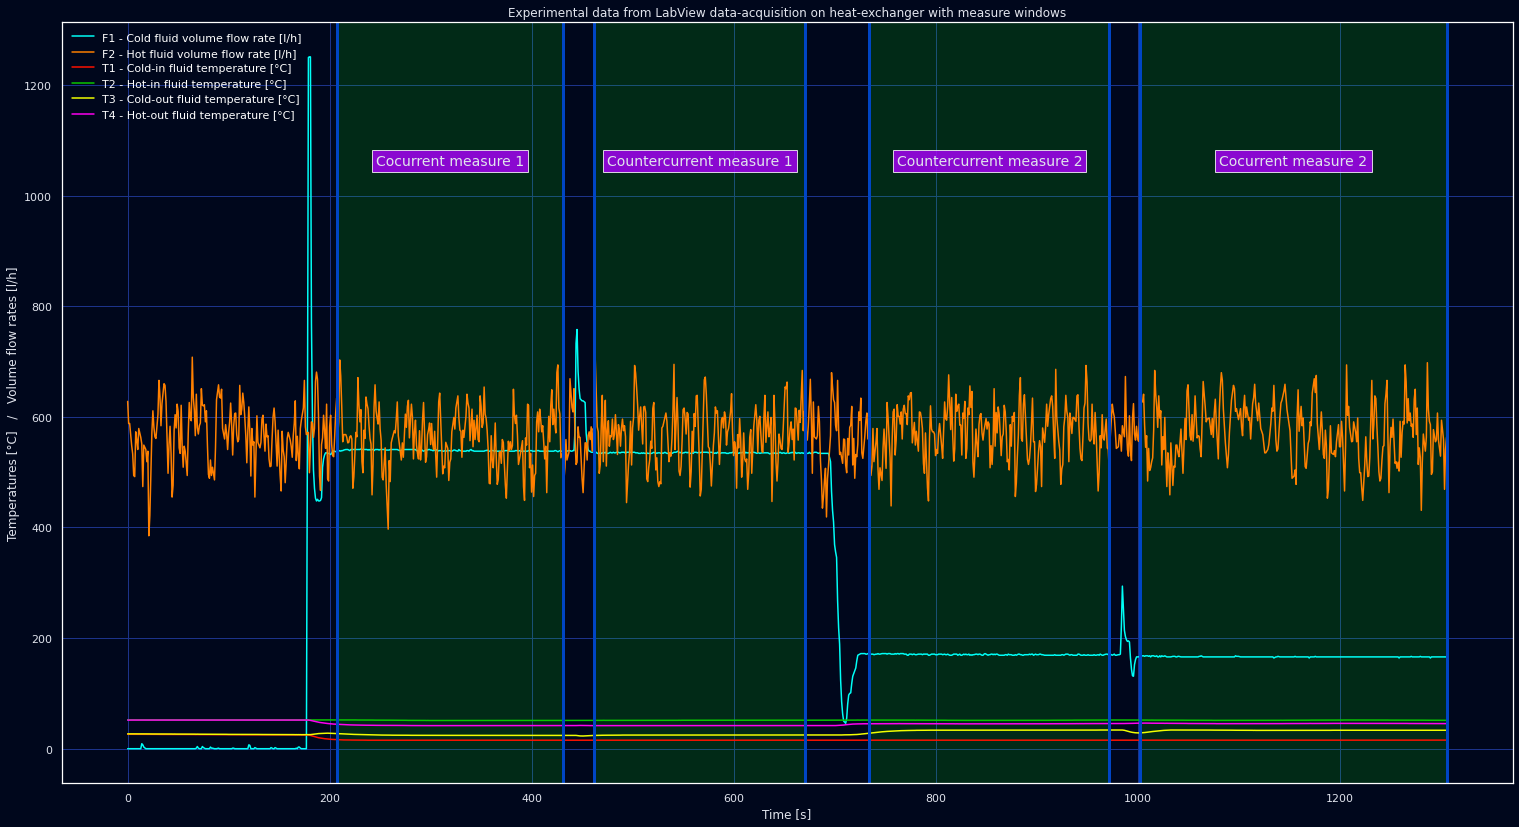

<Figure size 1872x1008 with 0 Axes>

In [32]:
he_measures_data, delim_idxs = da.find_plt_measures(he_data, measures_plt_flg, measures_dbg_flg)    # Function call to find and plot temperatures/volume flow rates, taken during LabView data-acquisition on heat-exchanger

* Create data-windows list with optimal steady-conditions for each measure (data-windows span in samples, defined in parameters section)


-----------------------------------------------------------------------
--> NEW 'find_stdy_cond()' FUNCTION CALL FOR Cocurrent measure 1
-----------------------------------------------------------------------

f1_stddev:  1.1240754280918839 
f2_stddev:  47.495766287438315 
t1_stddev:  0.03535092488376105
t2_stddev:  0.30036922763303214 
t3_stddev:  0.2840200094936256 
t4_stddev:  0.2679361403038012
mean_stddev:  8.25125300297407 

f1_stddev:  0.6103559060784889 
f2_stddev:  52.591290345690496 
t1_stddev:  0.04845941195208172
t2_stddev:  0.08074528004588409 
t3_stddev:  0.06258916236811773 
t4_stddev:  0.05811220796104254
mean_stddev:  8.908592052349352 

min_stddevs_datablocks_idx:  0

-----------------------------------------------------------------------
--> NEW 'find_stdy_cond()' FUNCTION CALL FOR Countercurrent measure 1
-----------------------------------------------------------------------

f1_stddev:  0.8637519410862924 
f2_stddev:  55.477547729891114 
t1_stddev:  0.04229142105

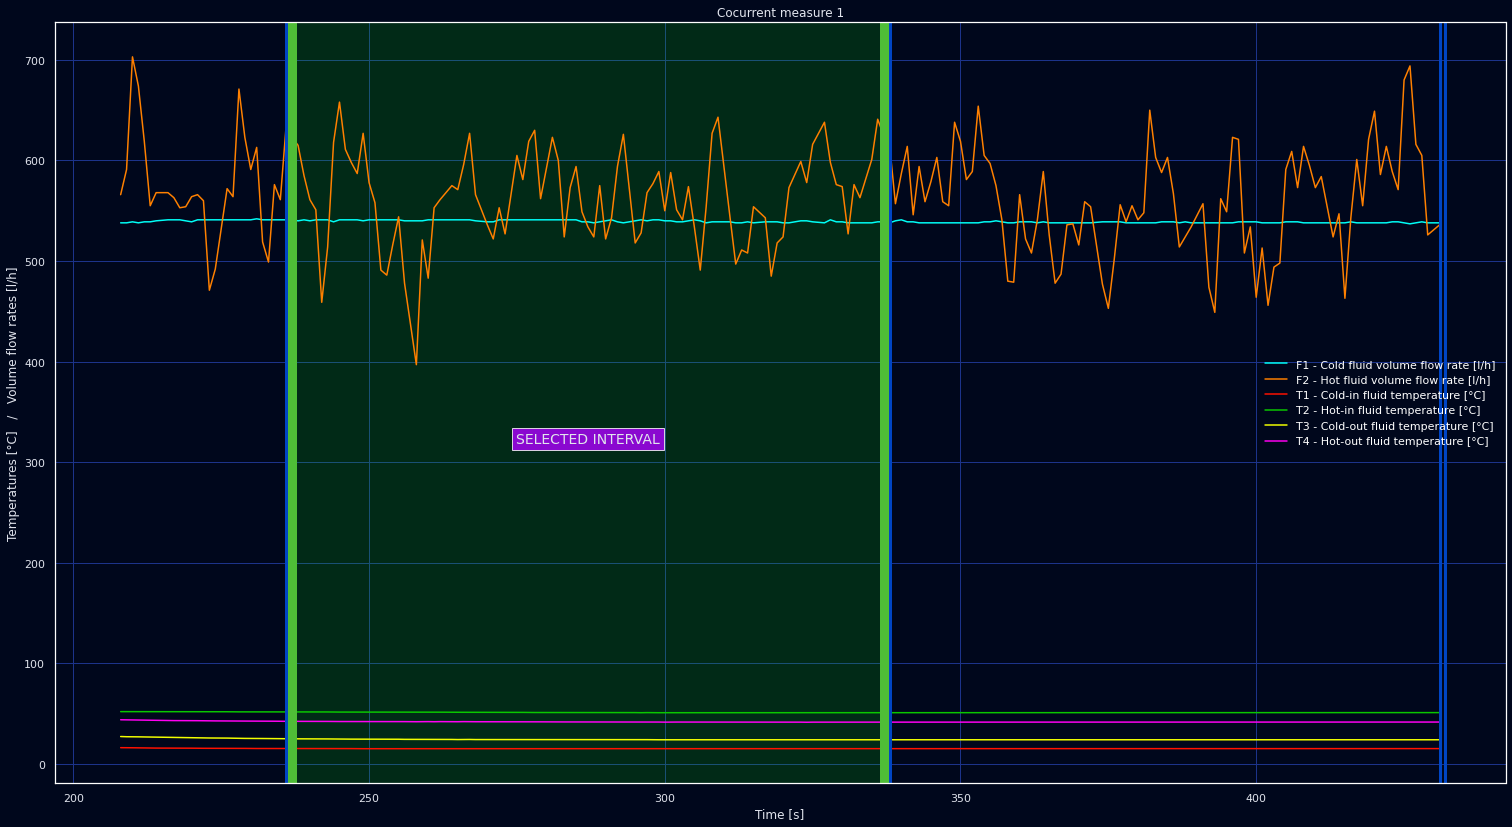

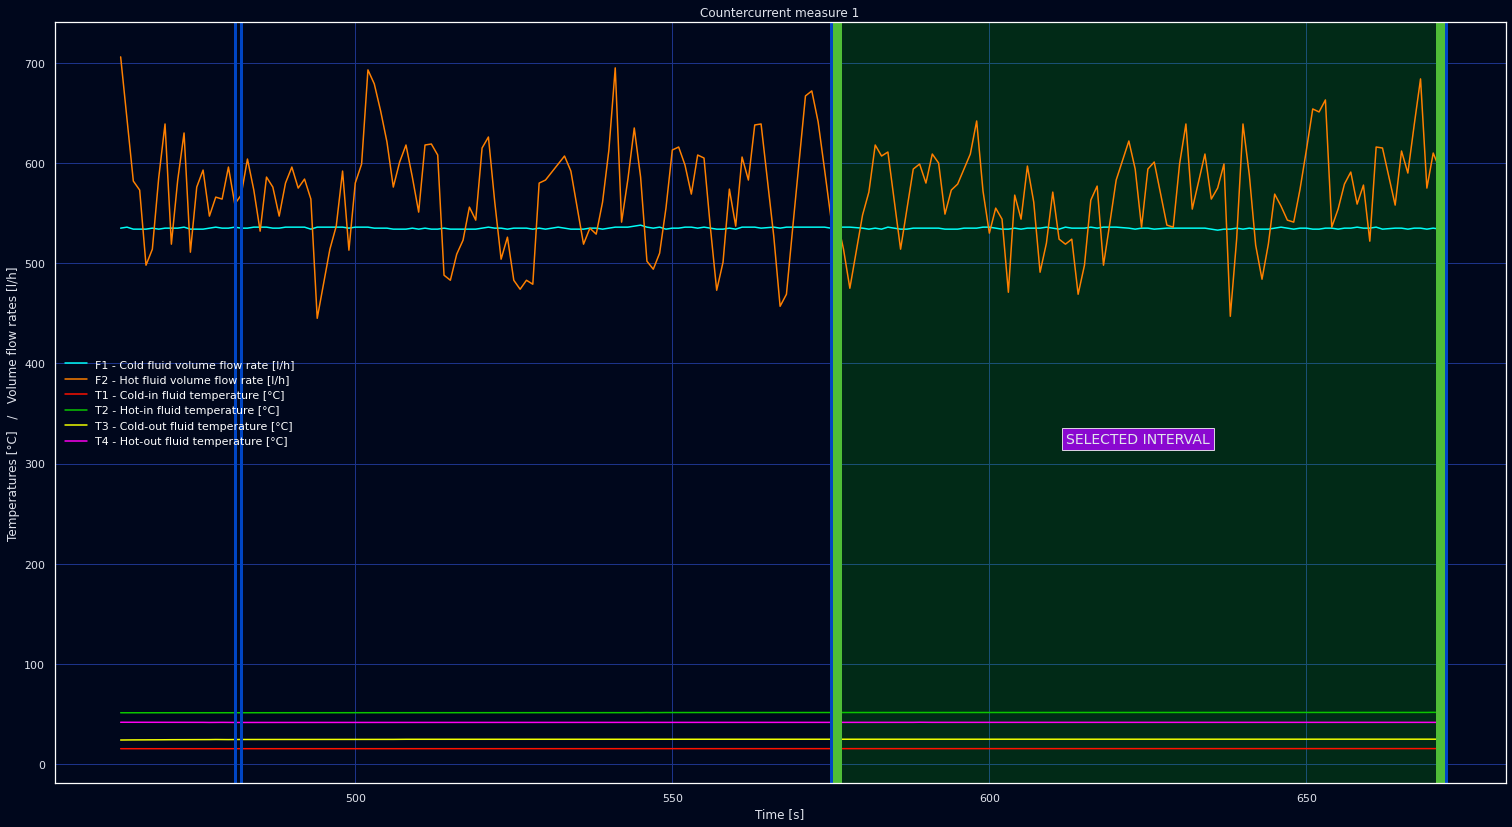

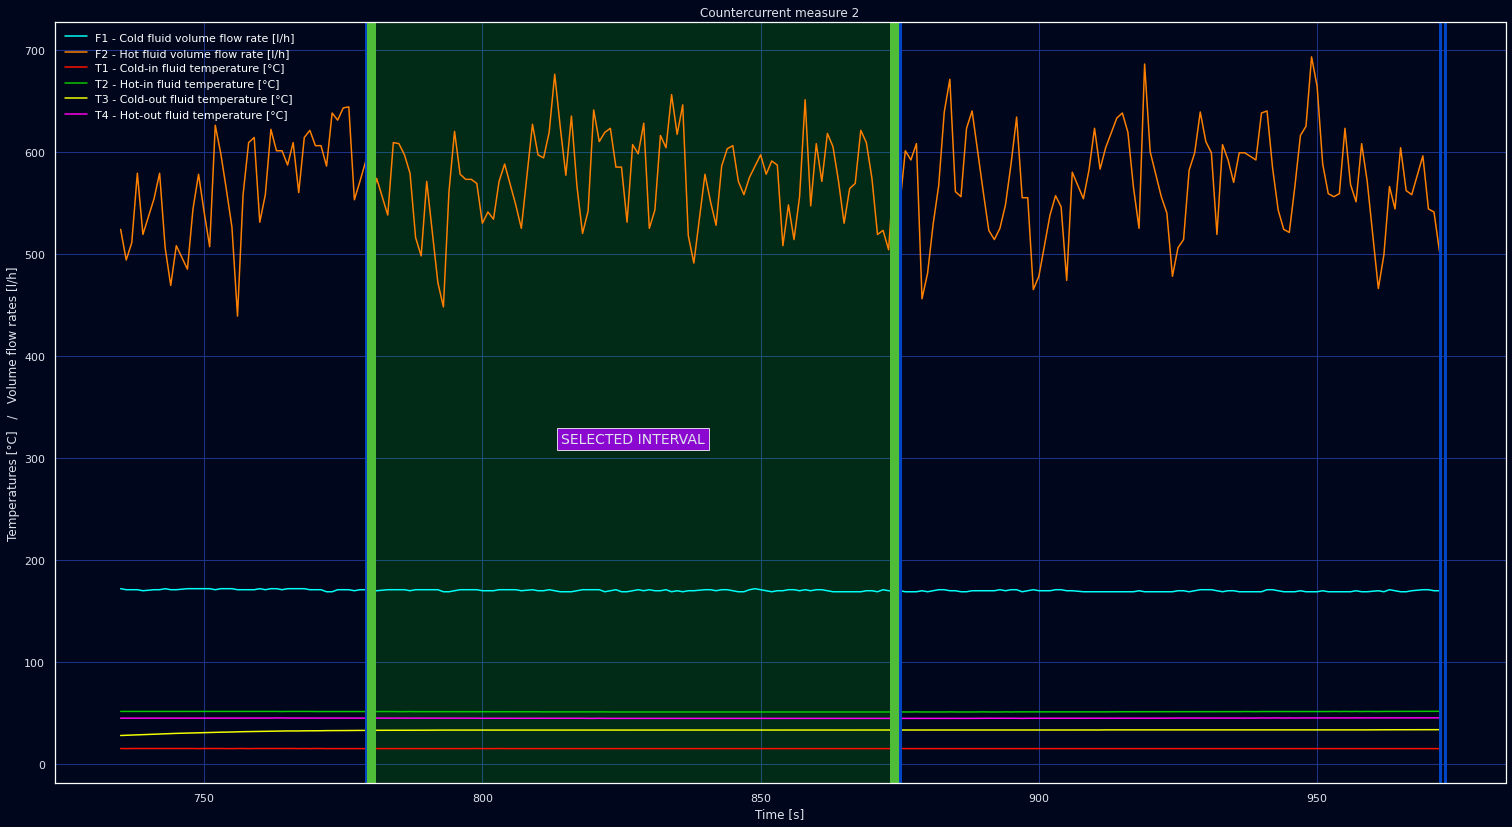

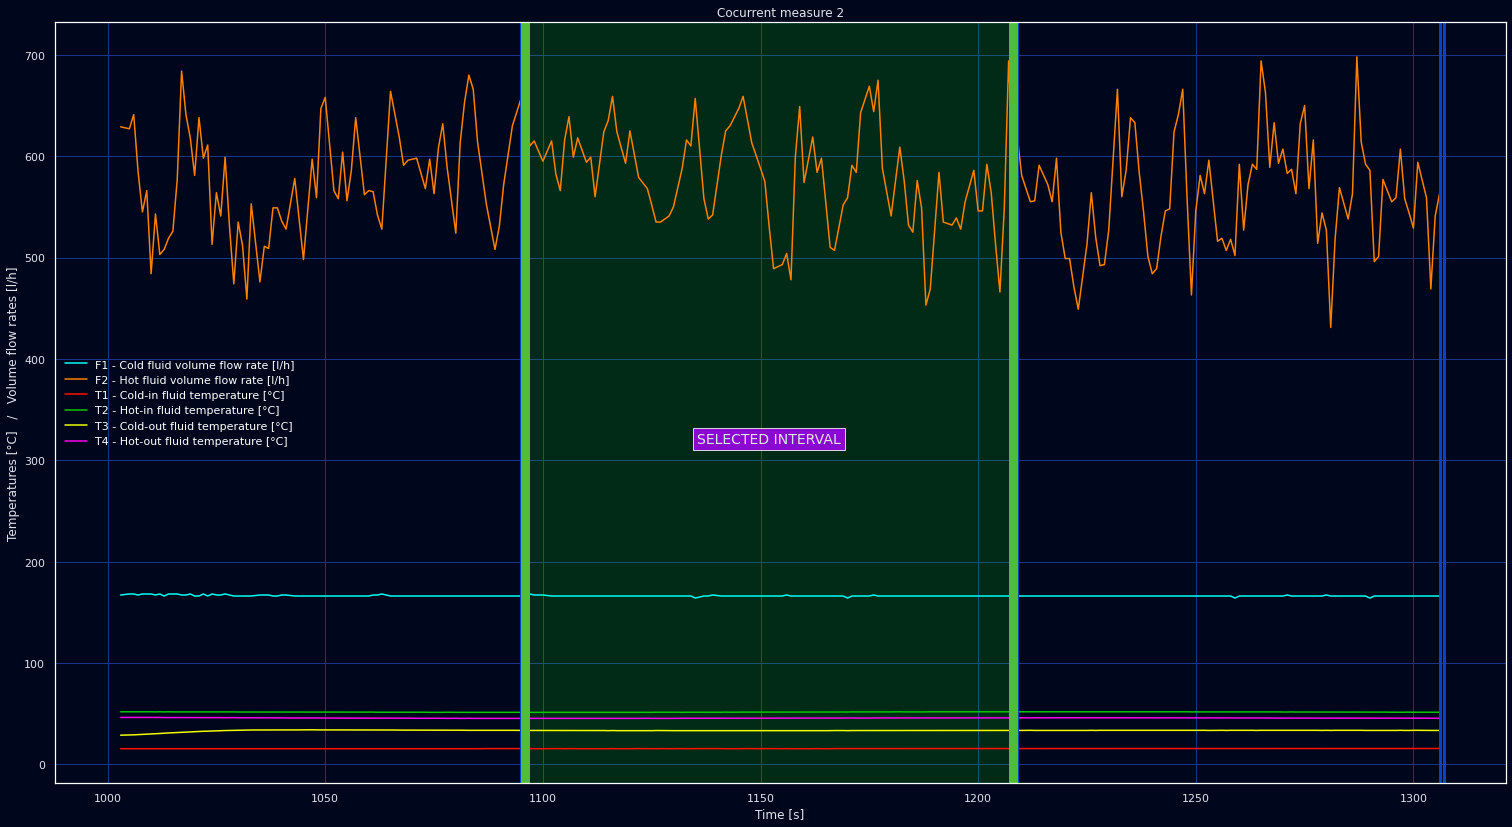

<Figure size 1872x1008 with 0 Axes>

In [33]:
sc_windows = da.find_plt_stdy_cond_win(he_measures_data, sc_win_span, sc_win_plt_flg, sc_win_dbg_flg)   # Function call to find and plot steady-conditions data windows

### - Measured variables definition and measures objects list creation

* Determine measured variables by calculating mean value in optimal steady-conditions data-windows and define measures list, to contain each measure's calculated/measured data

In [34]:
measures = da.def_meas_vars(sc_windows, mean_vals_dbg_flg)    # Function call to determine measured data and define measures data-structures list


--> Cocurrent measure 1 mean vals:
F1[l/h]: 539.9222222222222
F2[l/h]: 562.5222222222222
T1[°C]: 15.254444444444452
T2[°C]: 51.24088888888886
T3[°C]: 24.349777777777817
T4[°C]: 41.90299999999992

--> Countercurrent measure 1 mean vals:
F1[l/h]: 534.8333333333334
F2[l/h]: 568.4111111111112
T1[°C]: 15.413333333333329
T2[°C]: 51.51888888888898
T3[°C]: 24.821111111111083
T4[°C]: 41.686666666666596

--> Countercurrent measure 2 mean vals:
F1[l/h]: 170.2111111111111
F2[l/h]: 574.2333333333333
T1[°C]: 15.33355555555554
T2[°C]: 51.29666666666669
T3[°C]: 33.513222222222204
T4[°C]: 45.01066666666657

--> Cocurrent measure 2 mean vals:
F1[l/h]: 166.03333333333333
F2[l/h]: 578.8333333333334
T1[°C]: 15.414222222222243
T2[°C]: 51.46877777777776
T3[°C]: 33.24355555555555
T4[°C]: 45.49700000000002


## Thermophysics variables

### - Data import

* Import thermophysics variables data from (.csv) table files, creating 'DataFrames' variables --> Source: moodle-pdf (original file name: Proprietà termofisiche aria e acqua.pdf) and http://www.inductor-jmag.ru/files/content/a129160.pdf - pdf page 28 / page 21 - Table 4

In [35]:
air_atmp, water, aisi_316 = tv.load_thermophys_vars_data()    # Function call to load thermophysics vars from (.csv) table files, creating new pandas DataFrames variables

### - Air's thermophysics variables polynomial approximation (at atm pressure) 

* Function call to apply air's thermophysics variables polynomial approximation and plotting vs temperature (at atmospheric pressure)

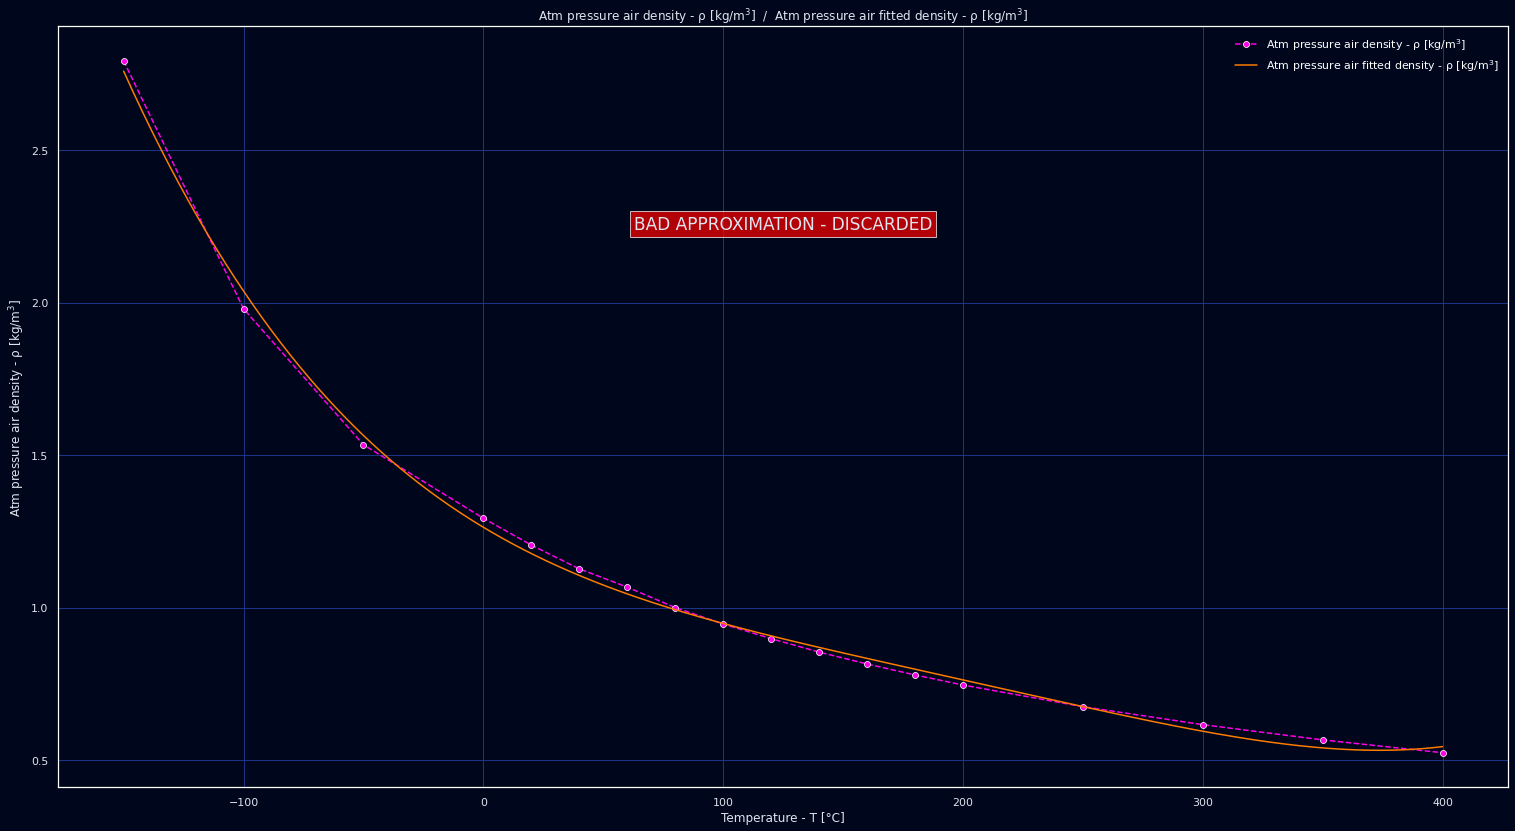

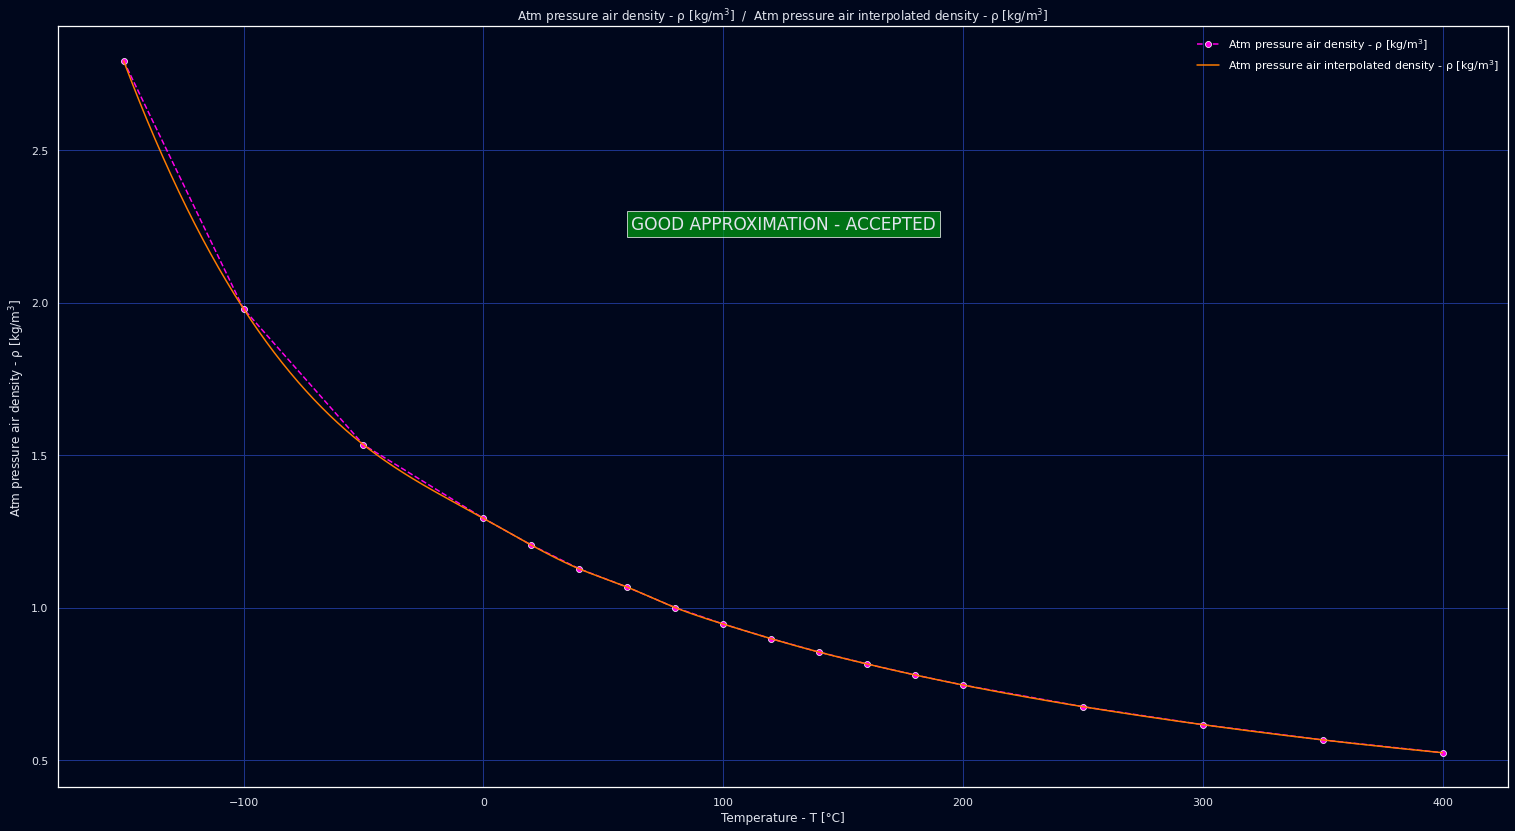

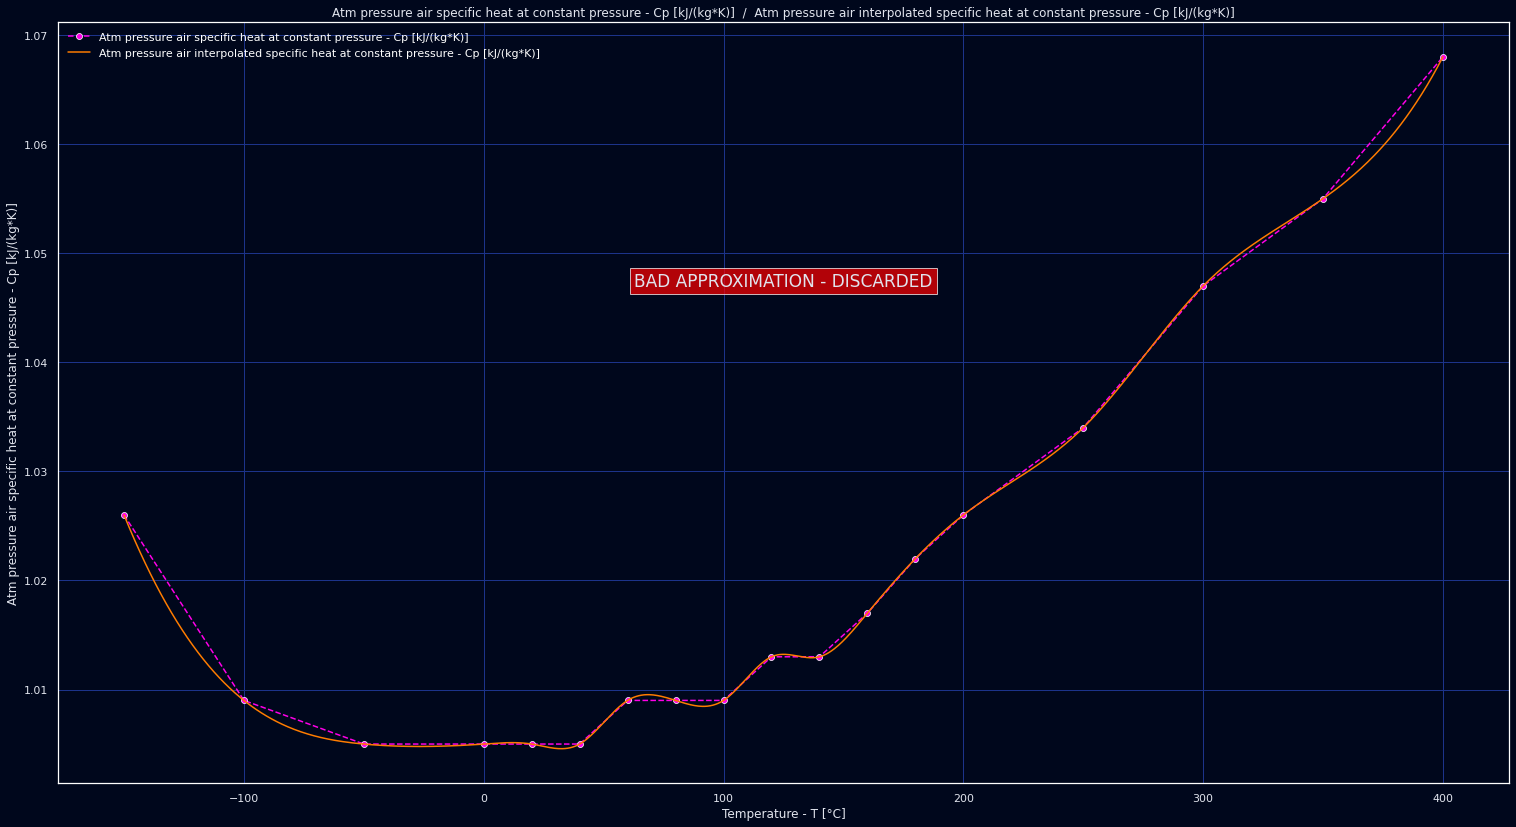

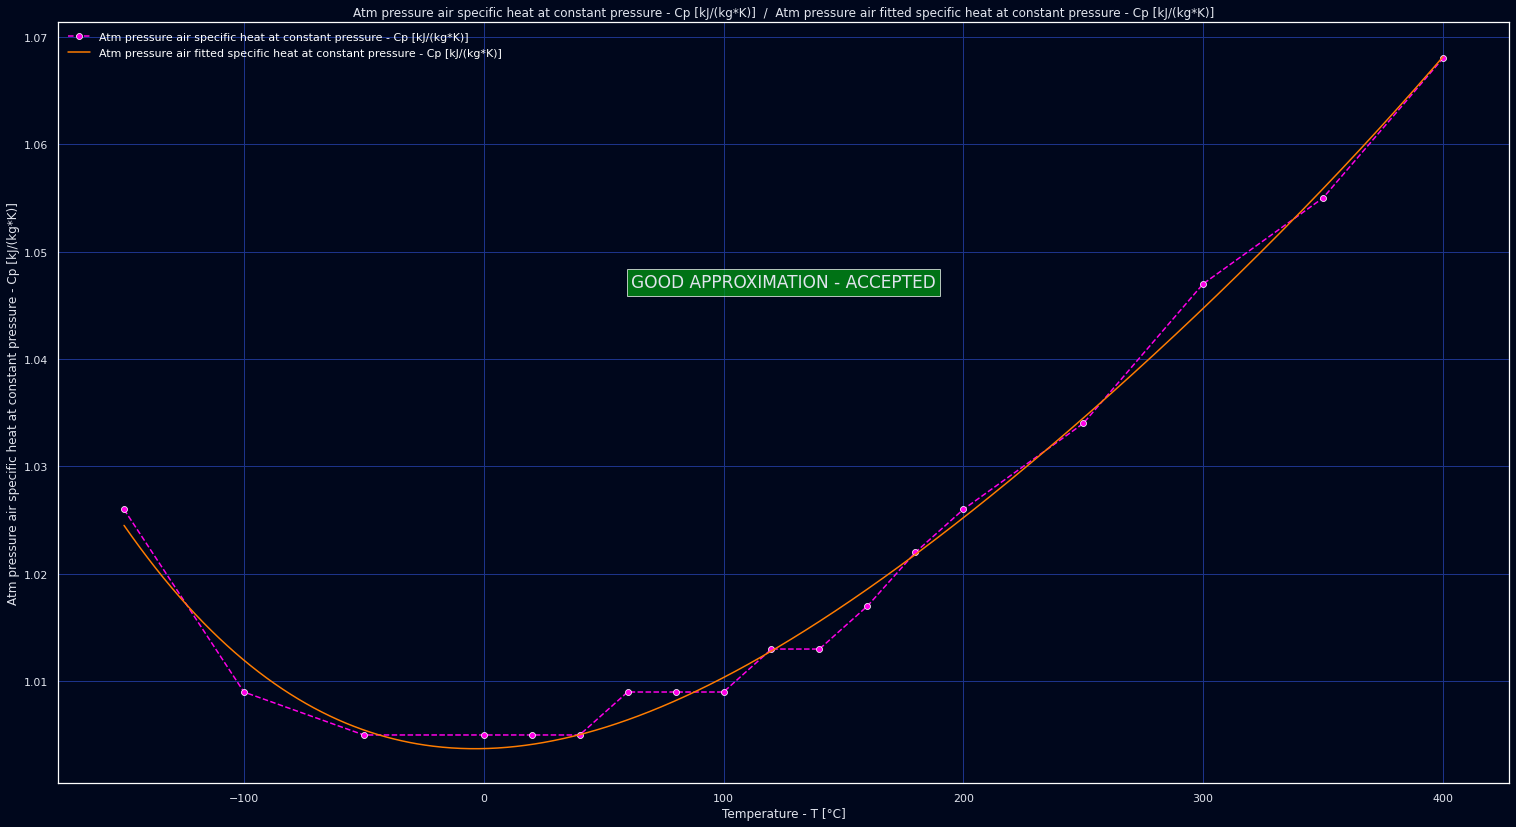

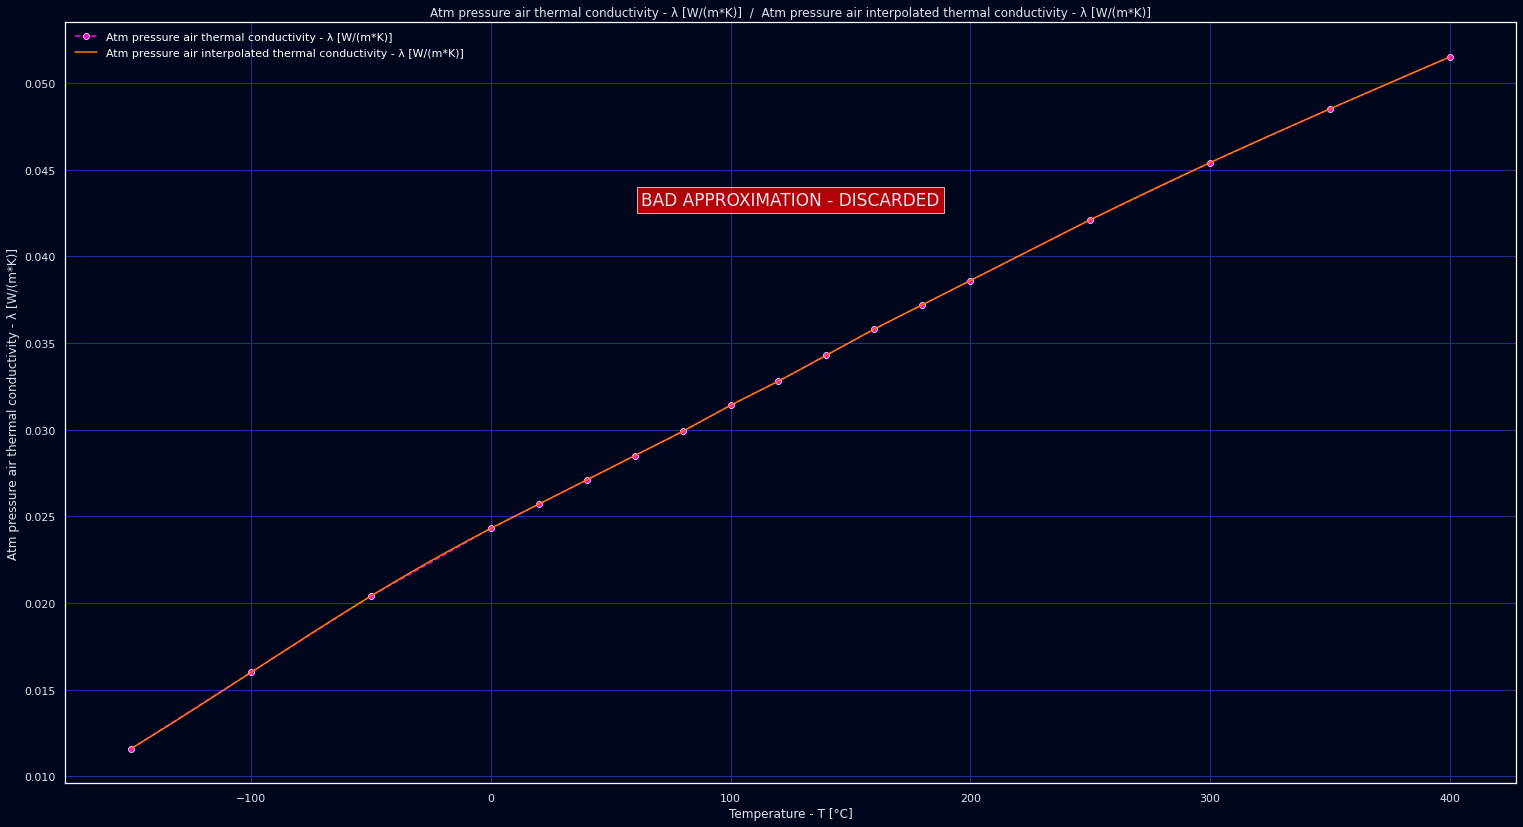

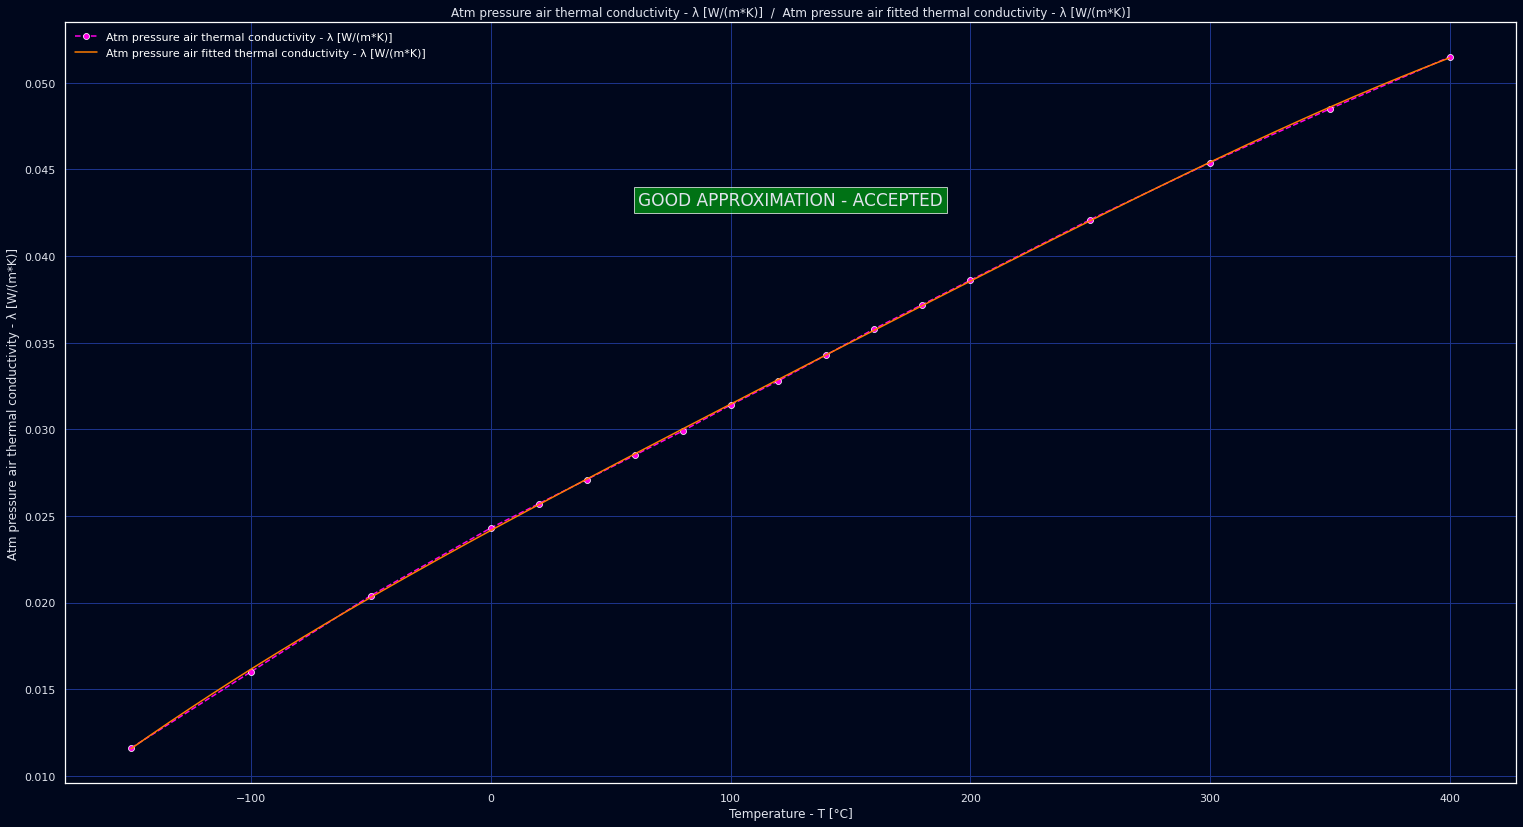

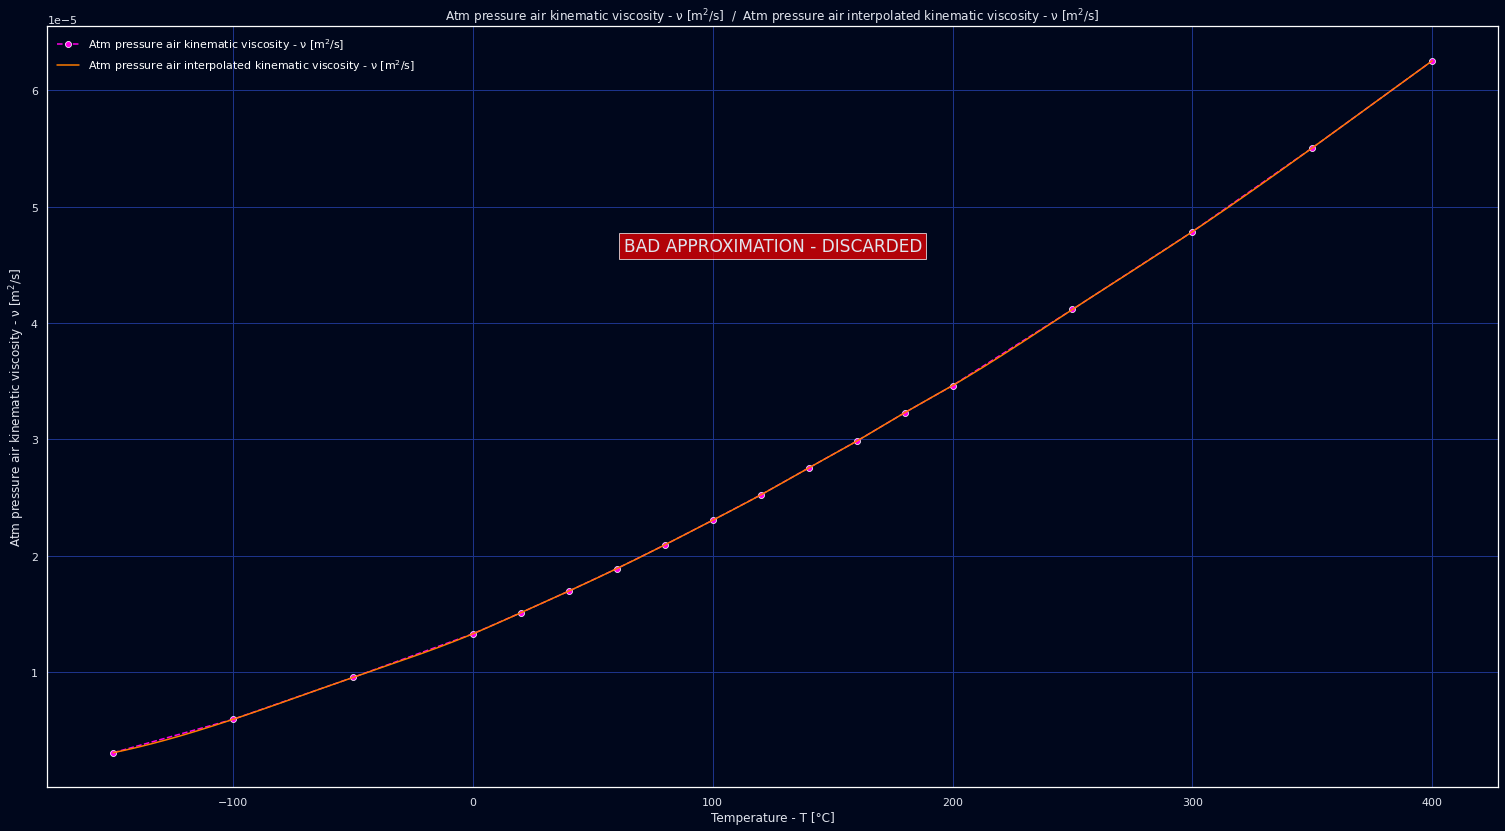

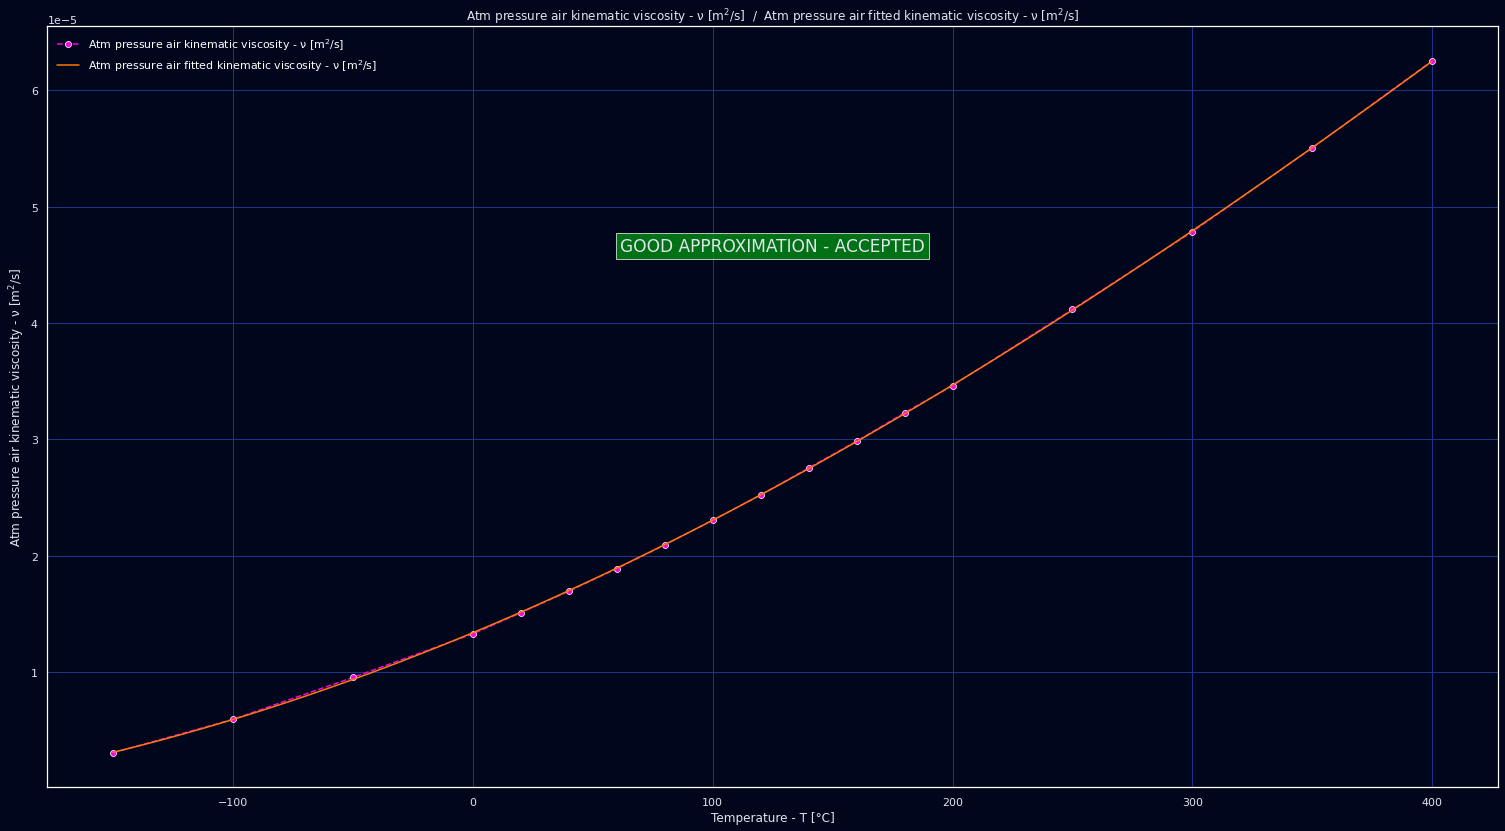

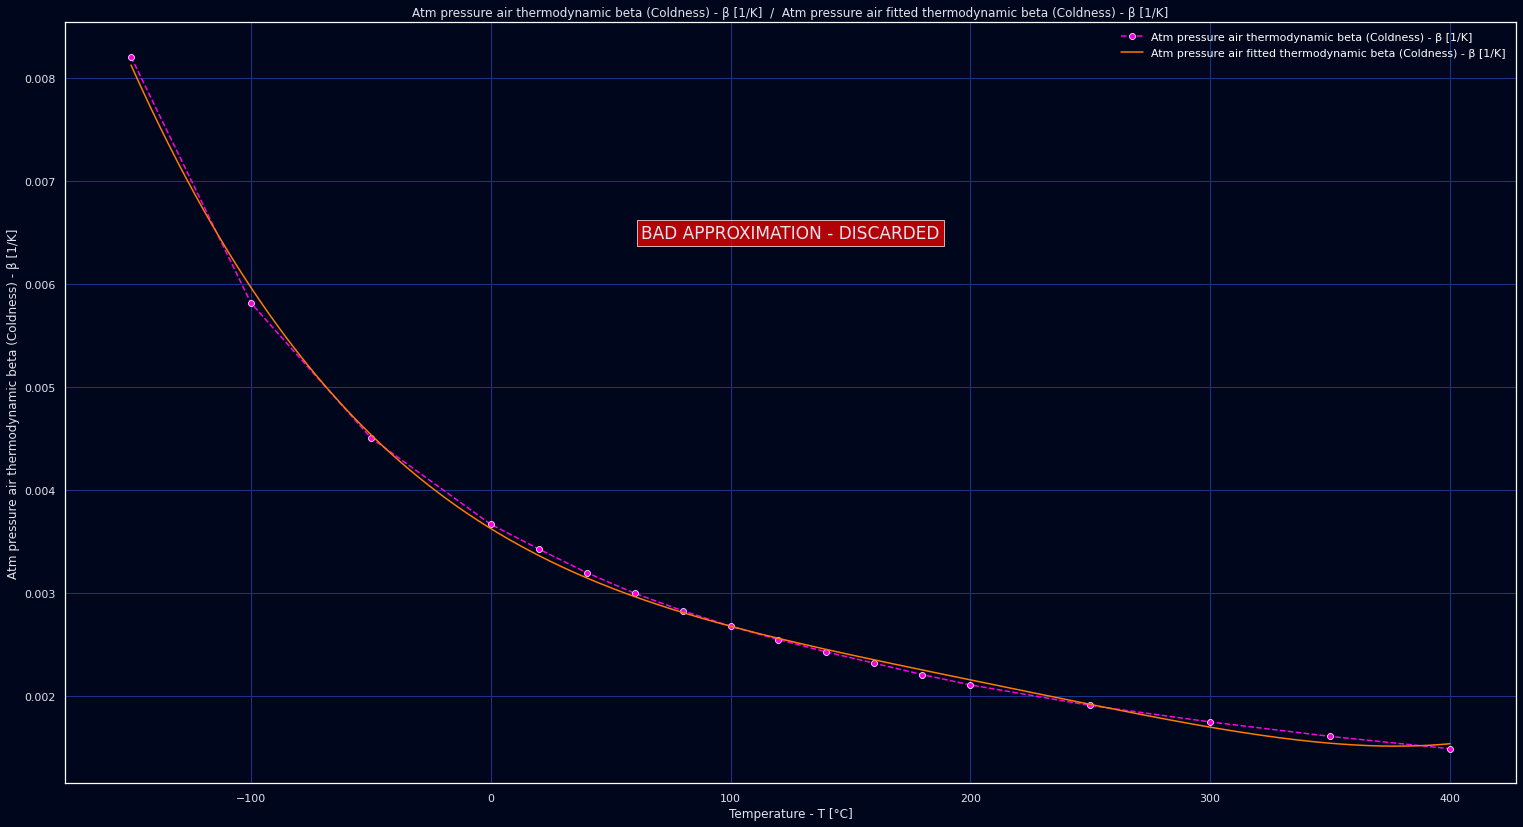

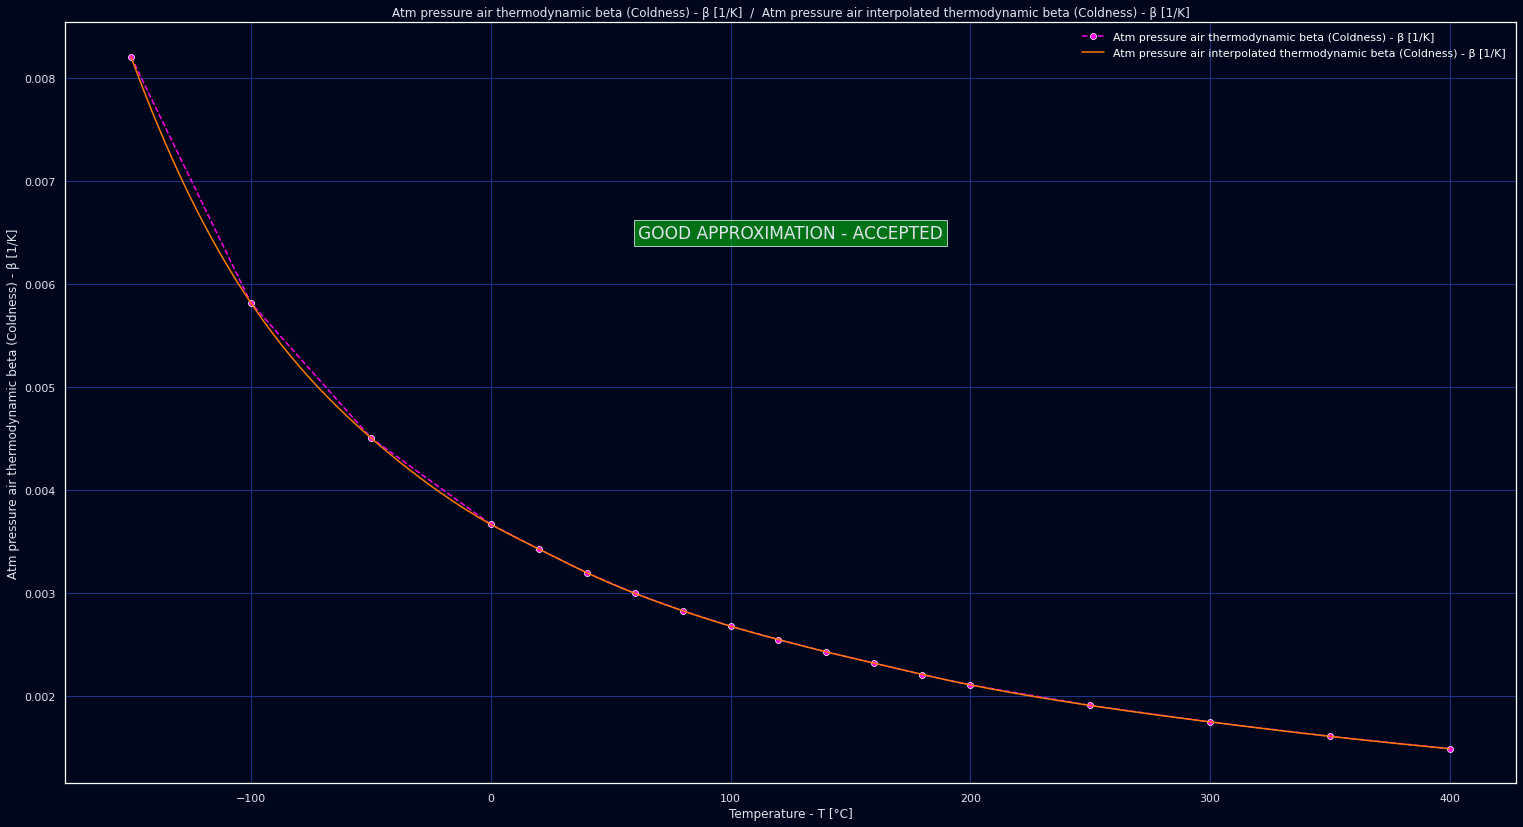

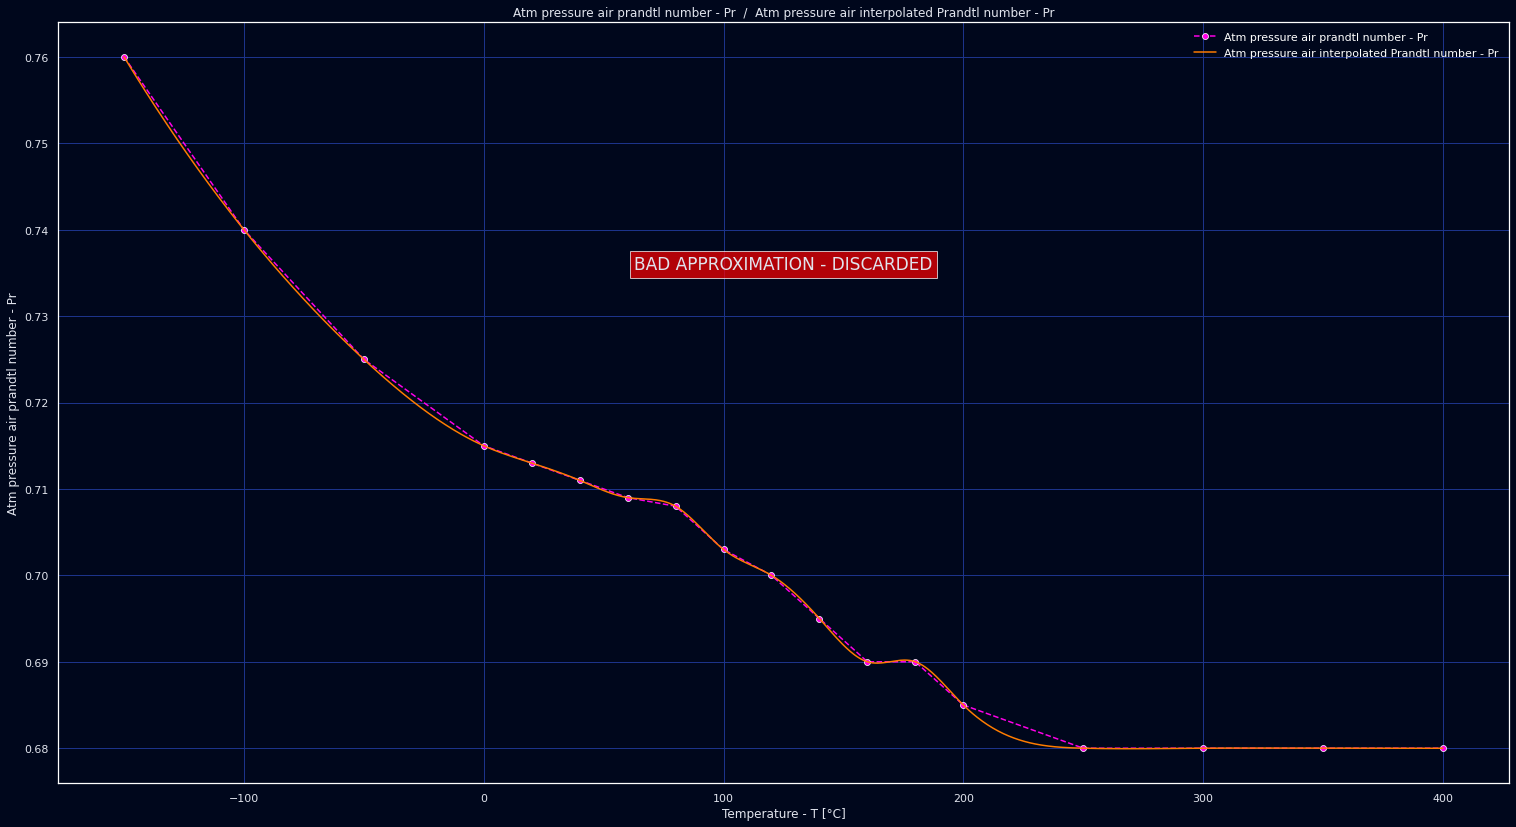

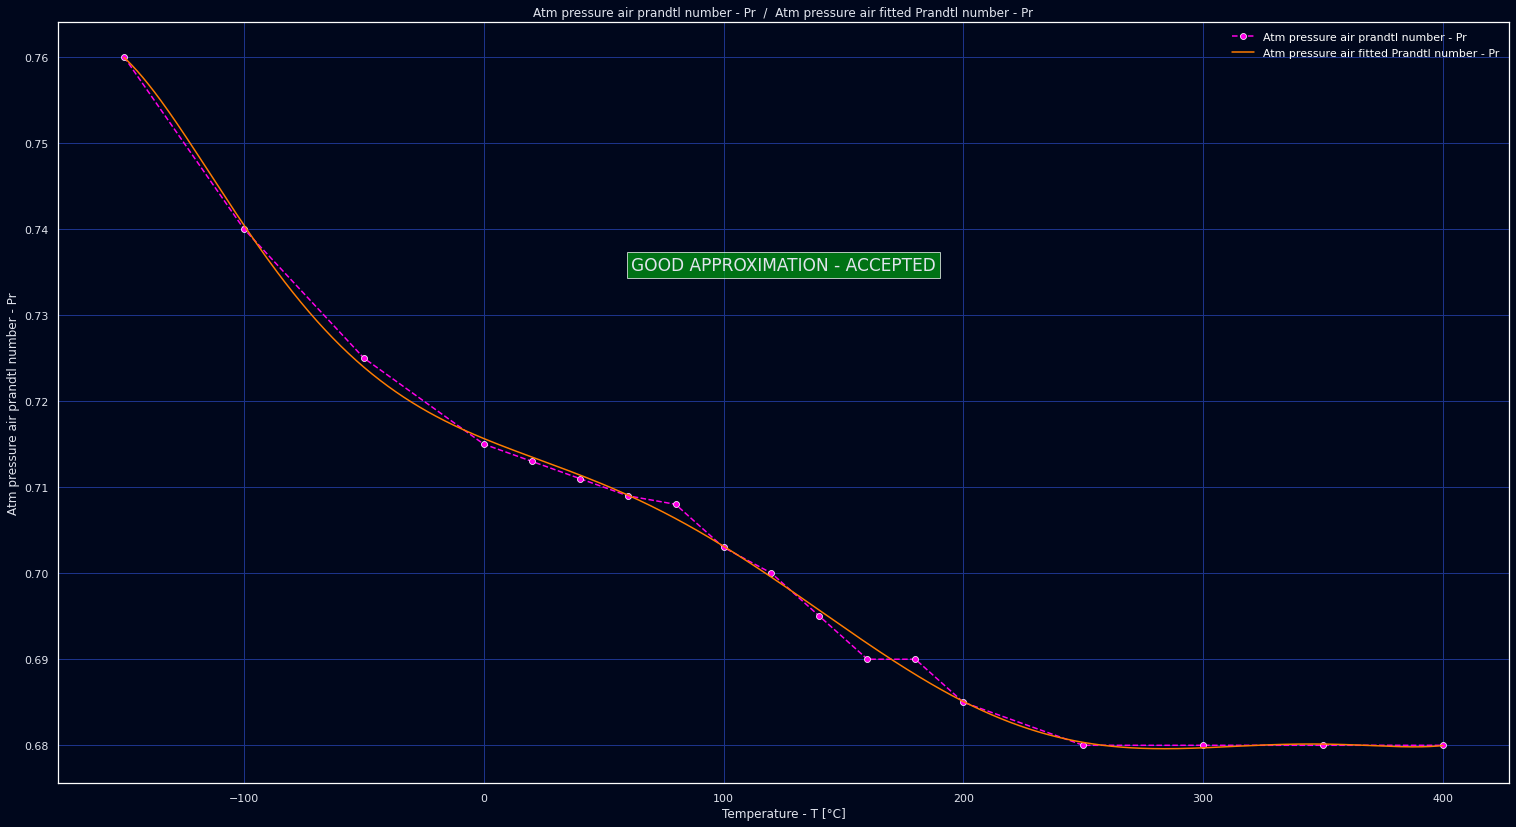

<Figure size 1872x1008 with 0 Axes>

In [36]:
f_air_atmp_rho, f_air_atmp_cp, f_air_atmp_lambda, f_air_atmp_ni, f_air_atmp_beta, f_air_atmp_pr = tv.poly_approx_plot_air_atmp_thermophys_vars(air_atmp, thermophys_vars_plt_flg)   # Function call

### - Water's thermophysics variables polynomial approximation 

* Function call to apply water's thermophysics variables polynomial approximation and plotting vs temperature

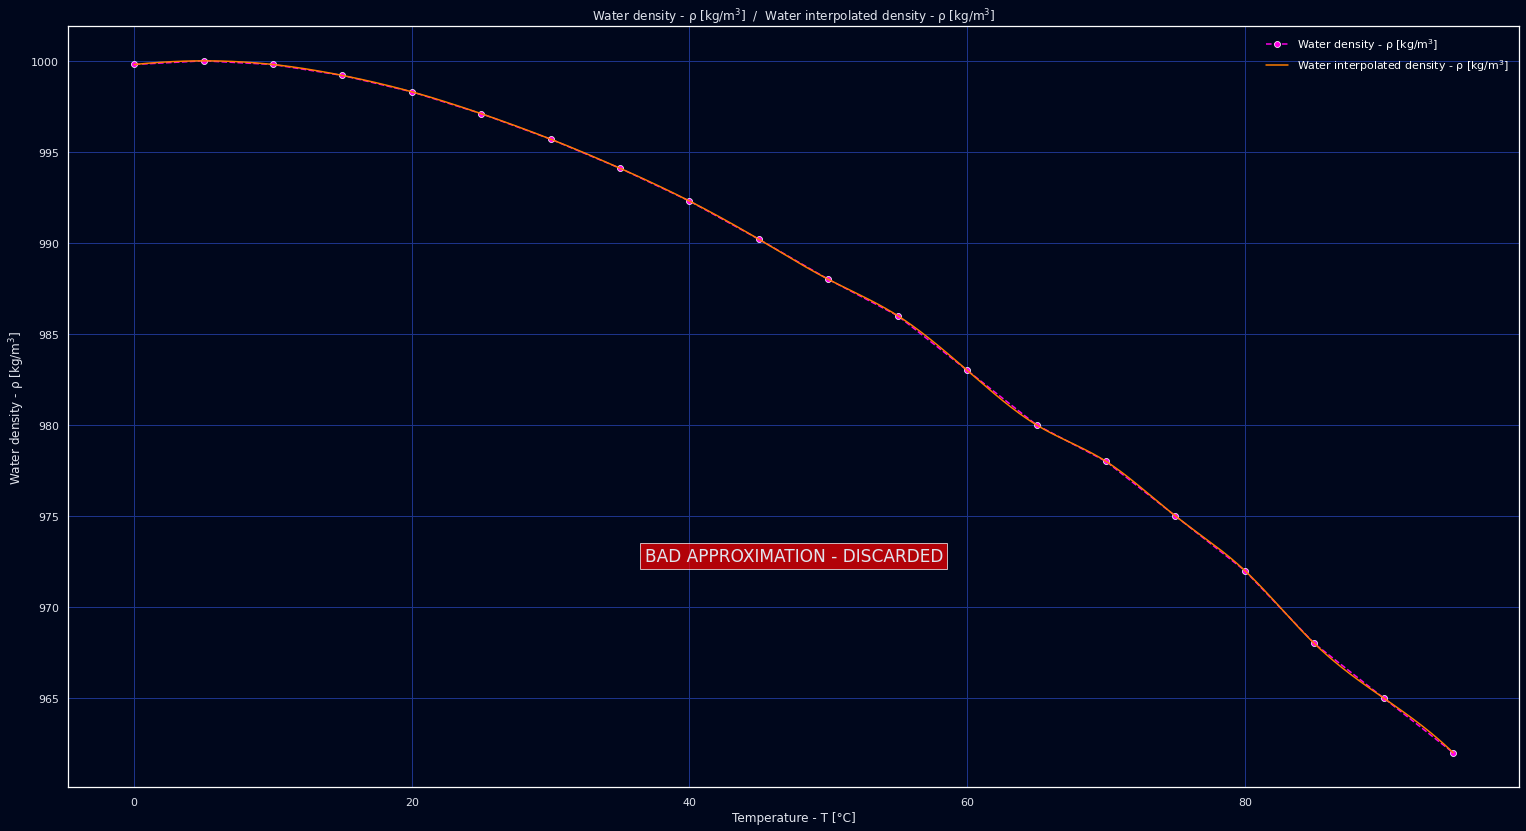

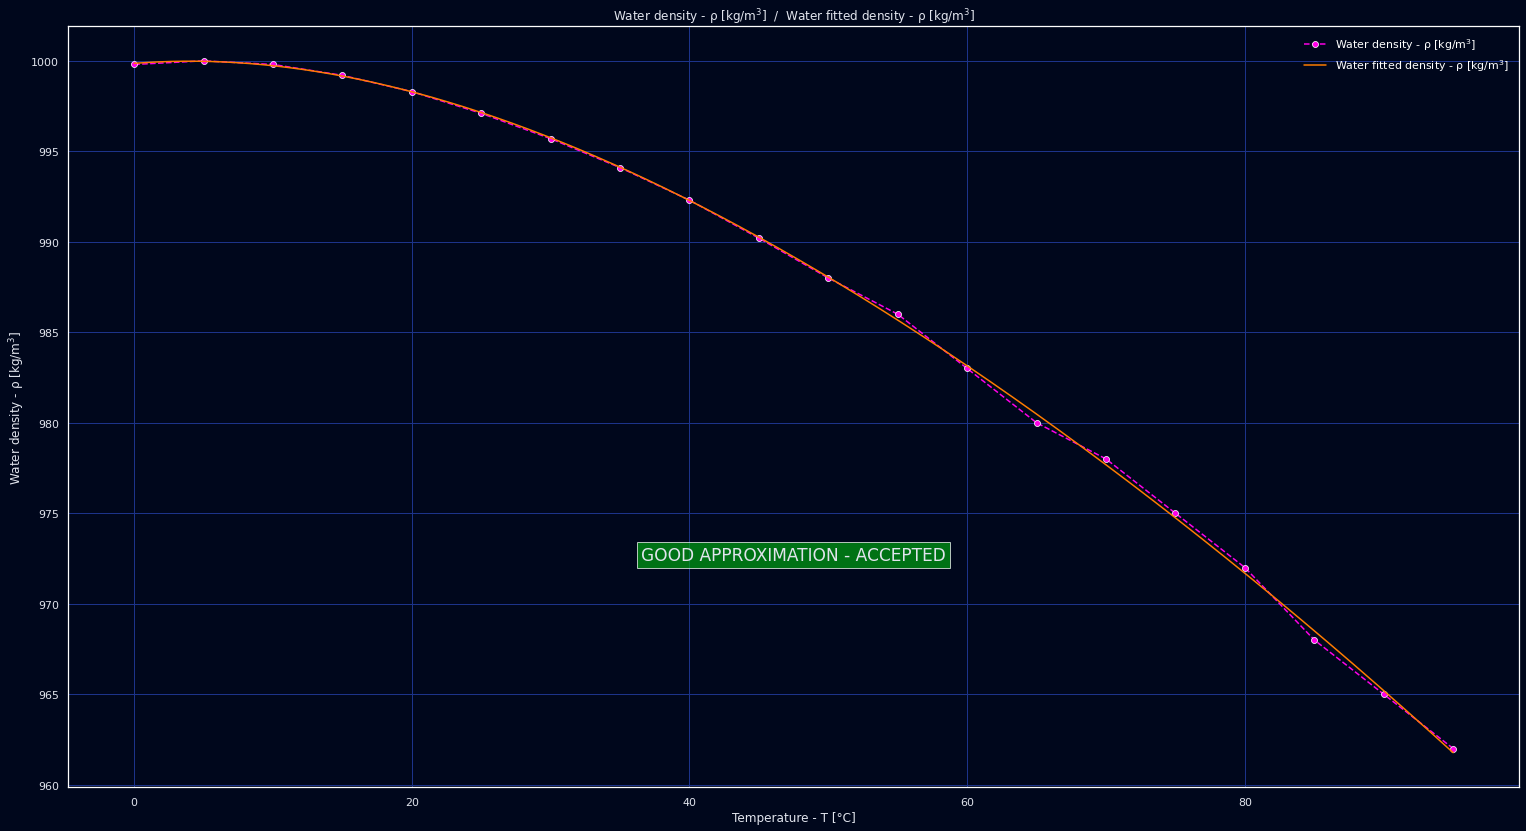

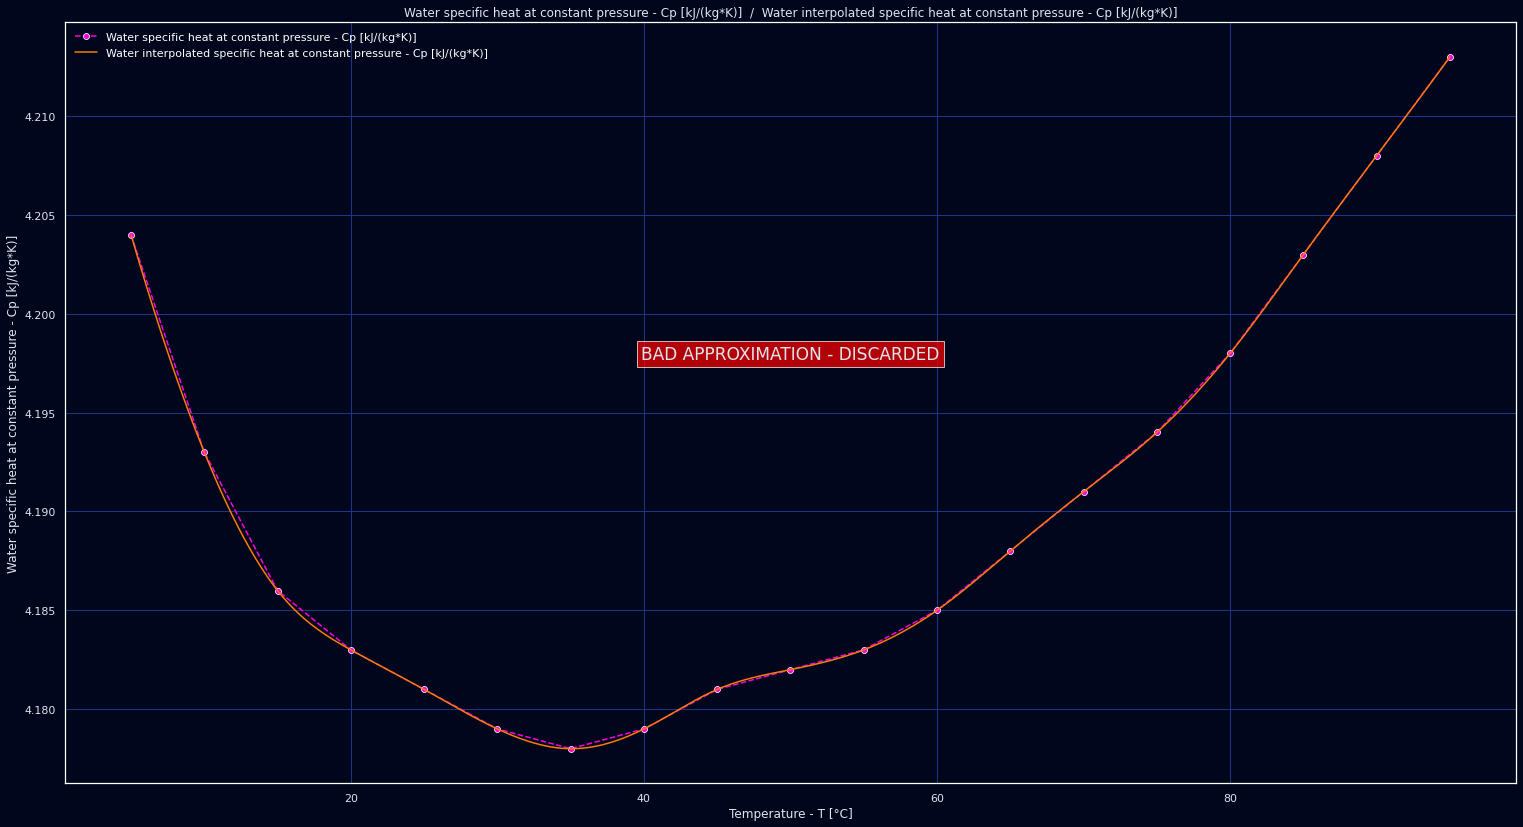

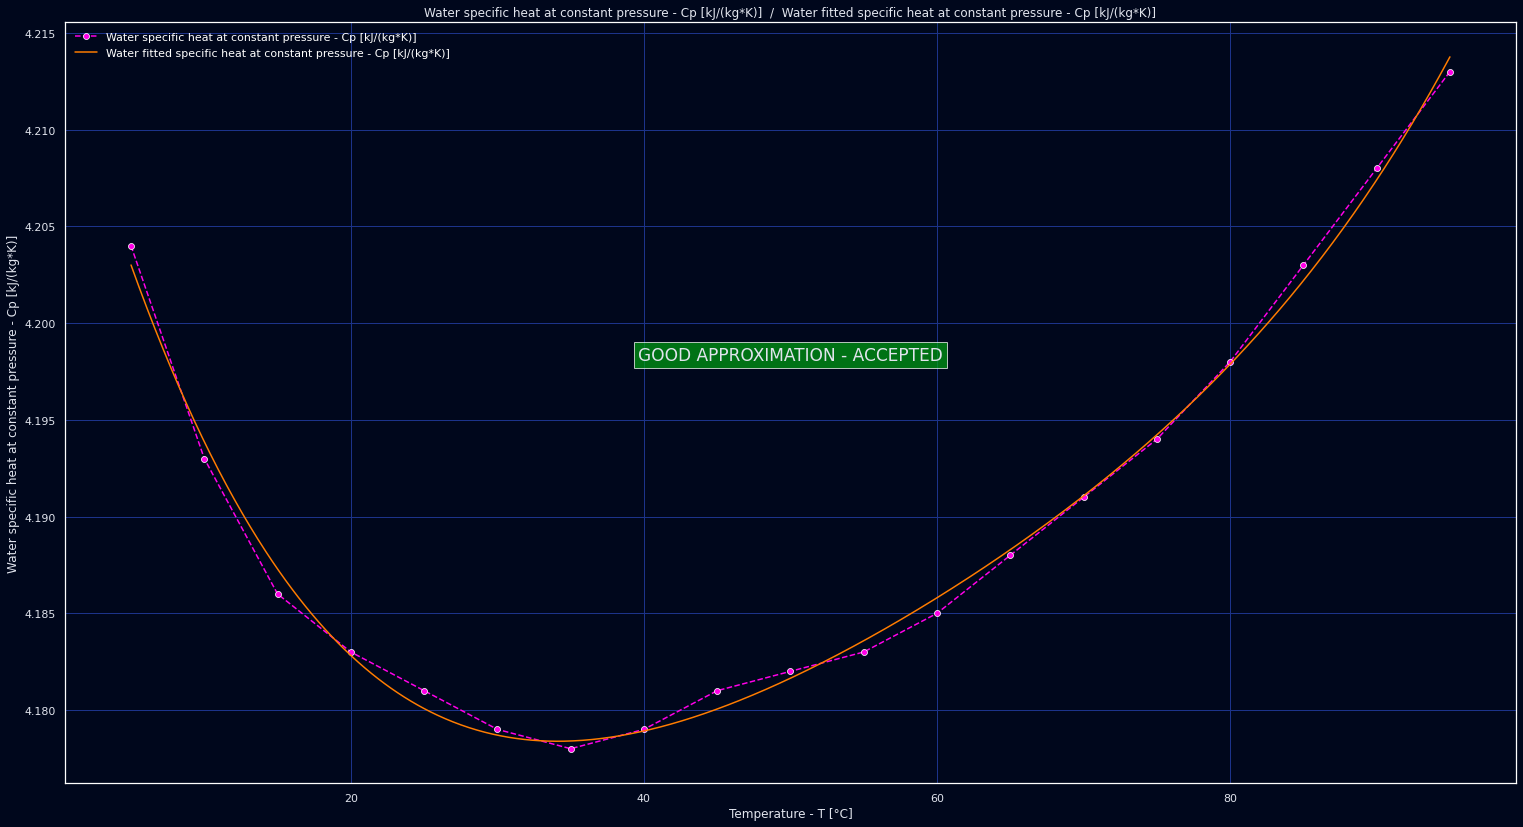

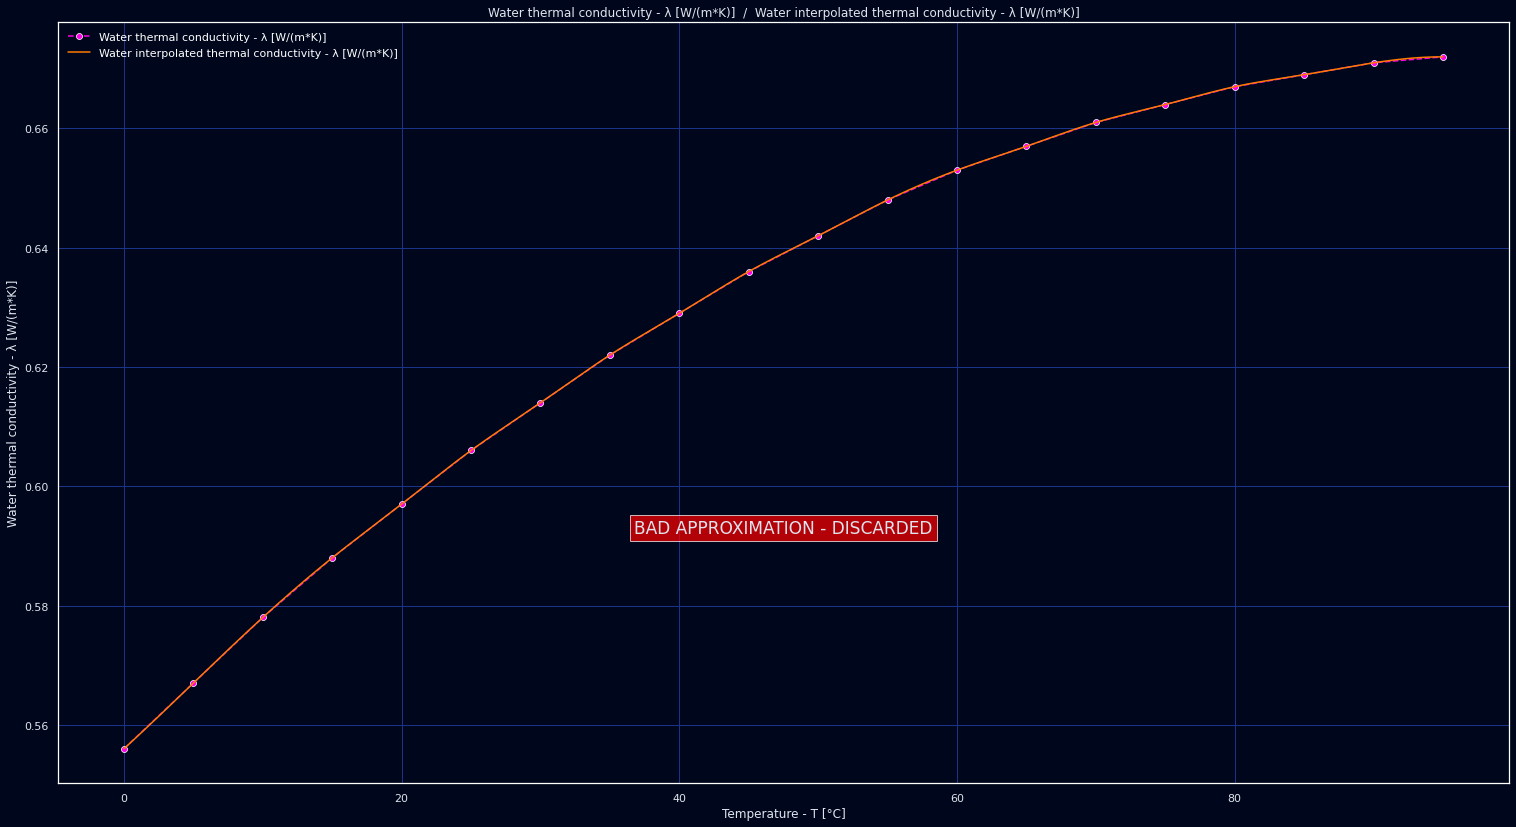

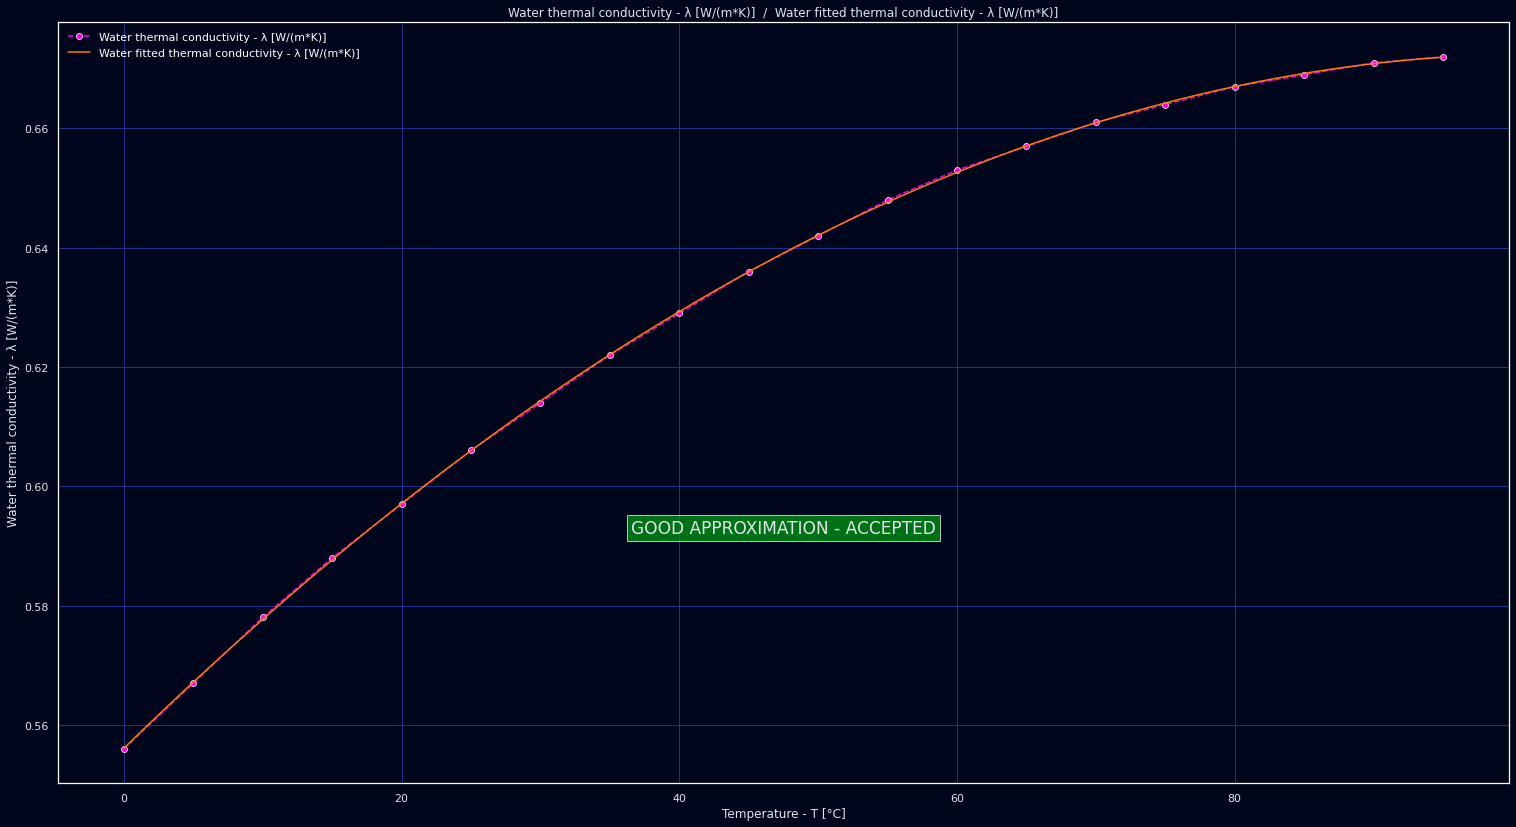

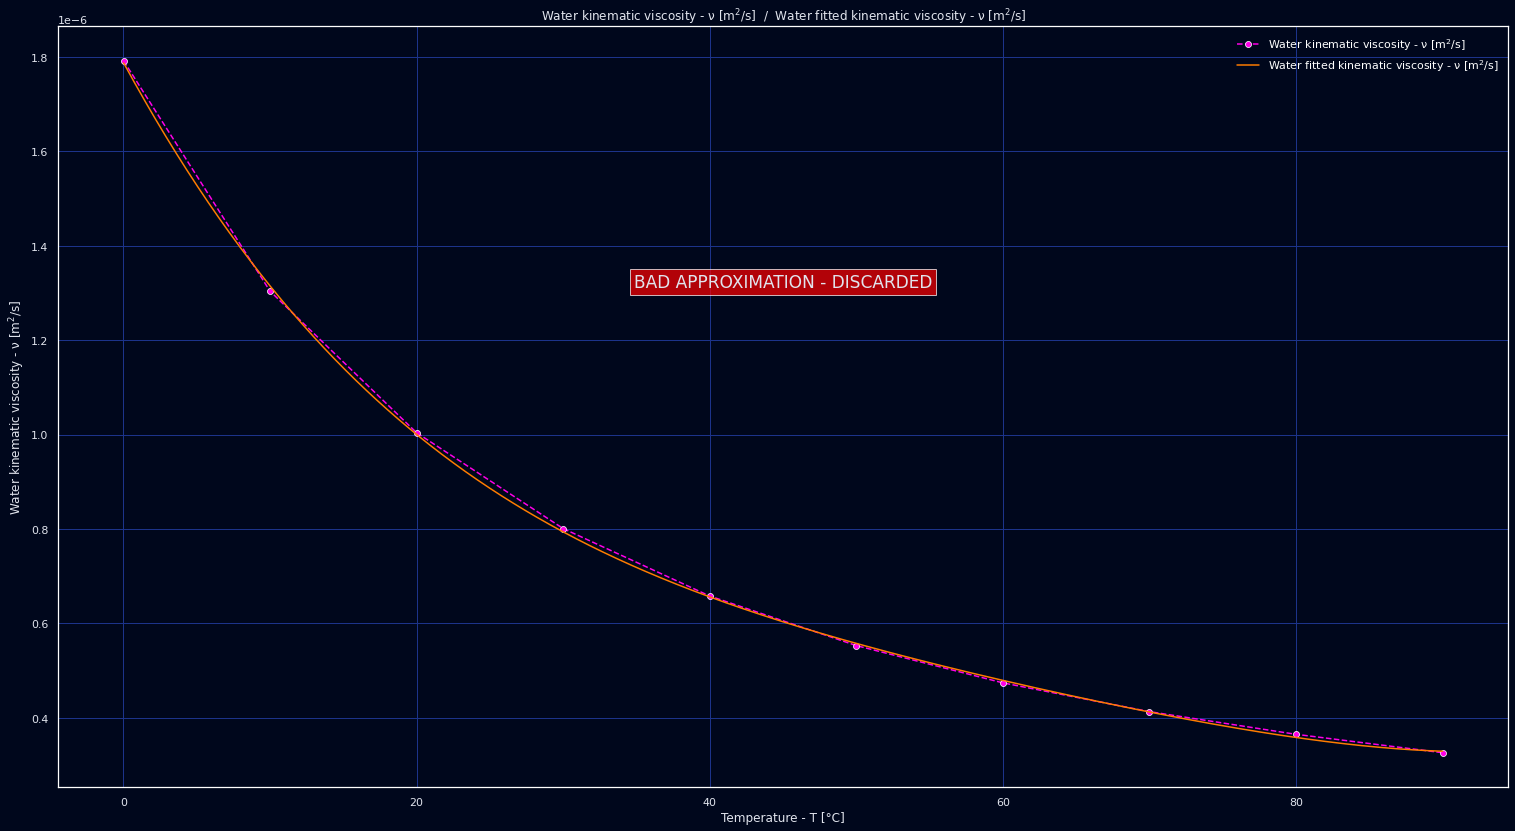

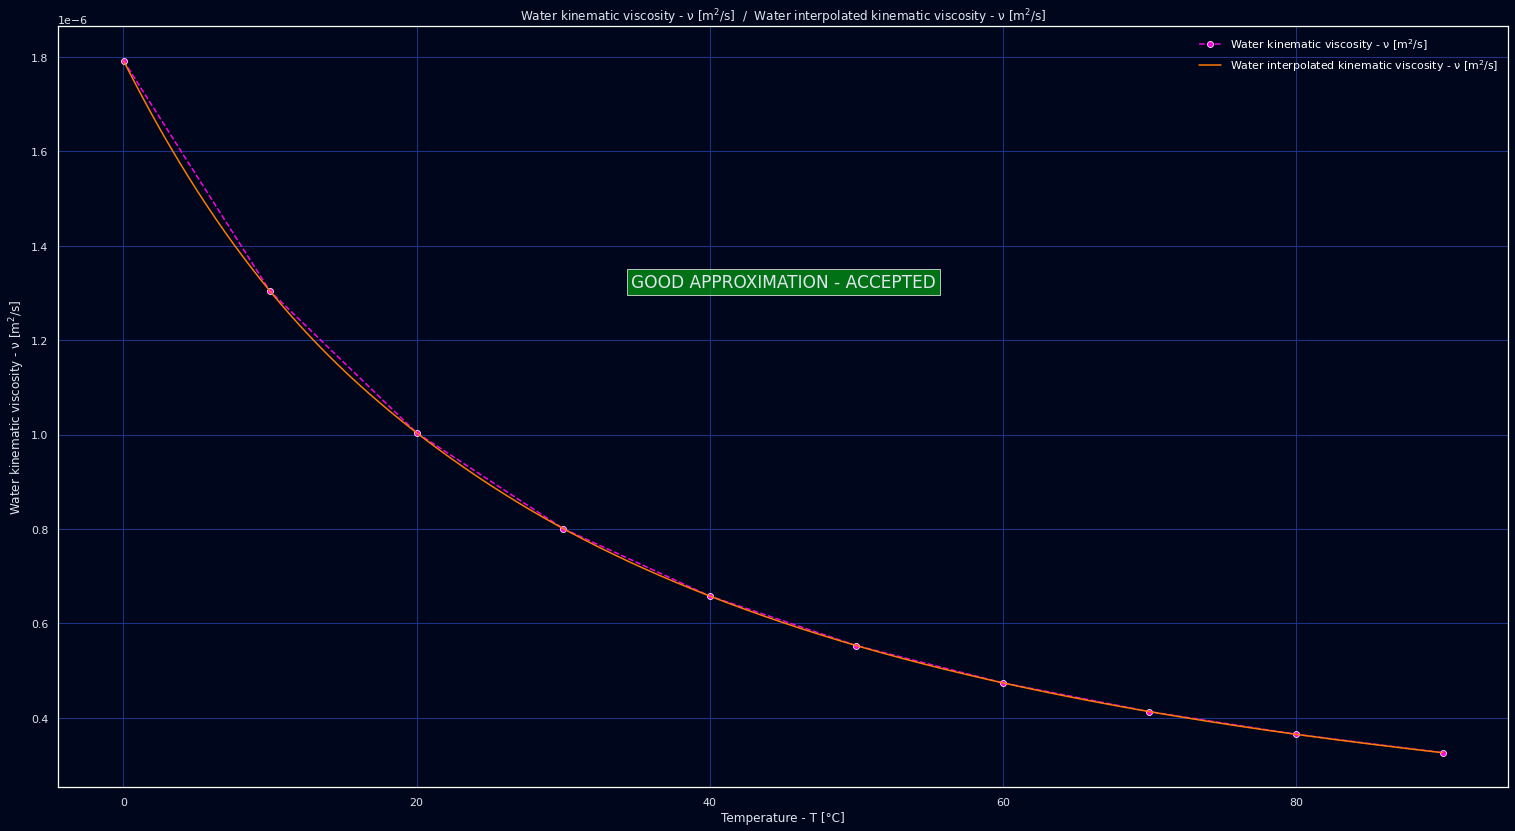

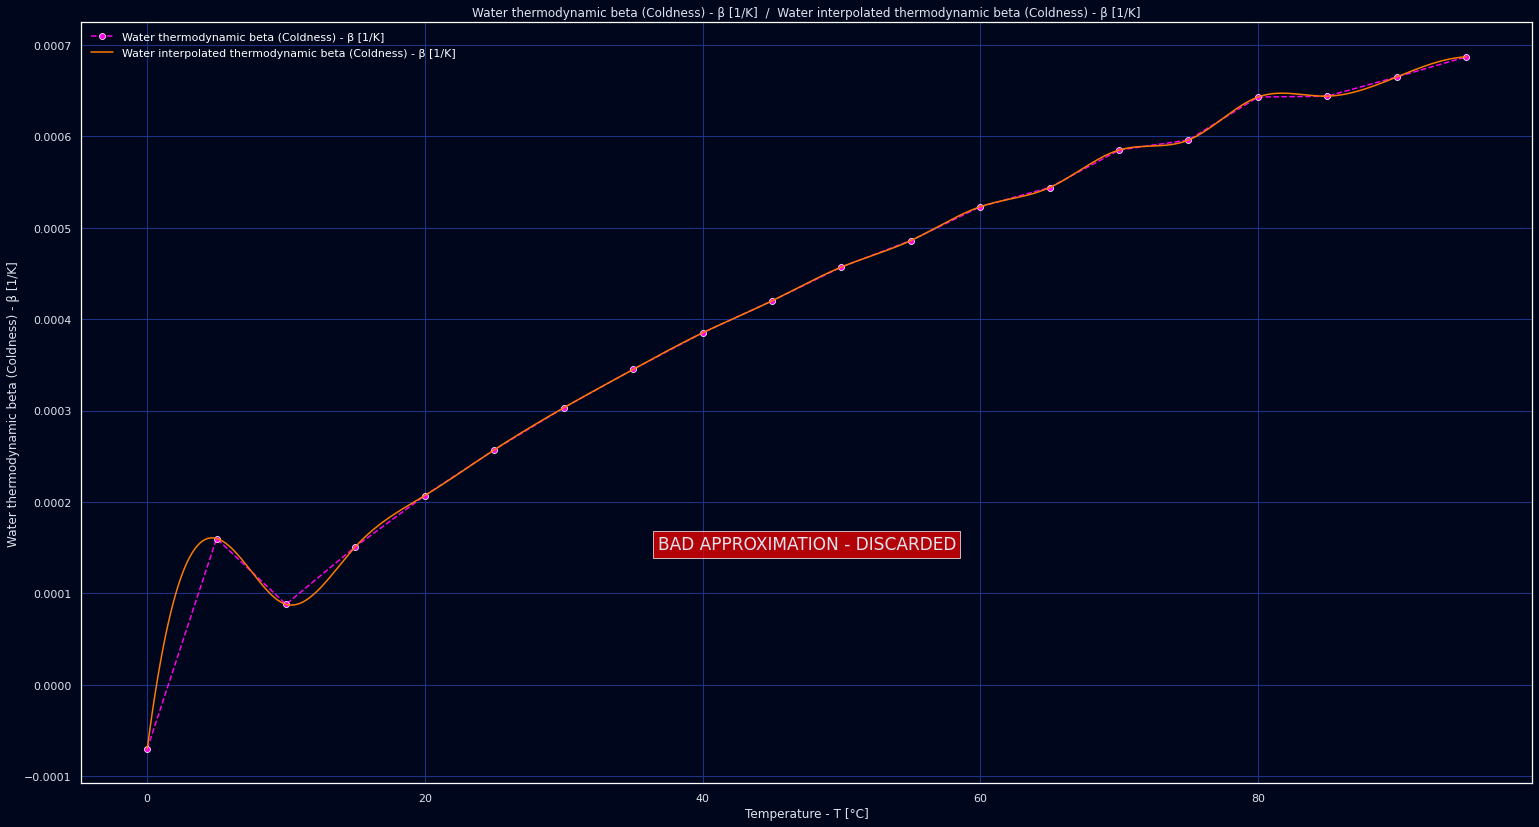

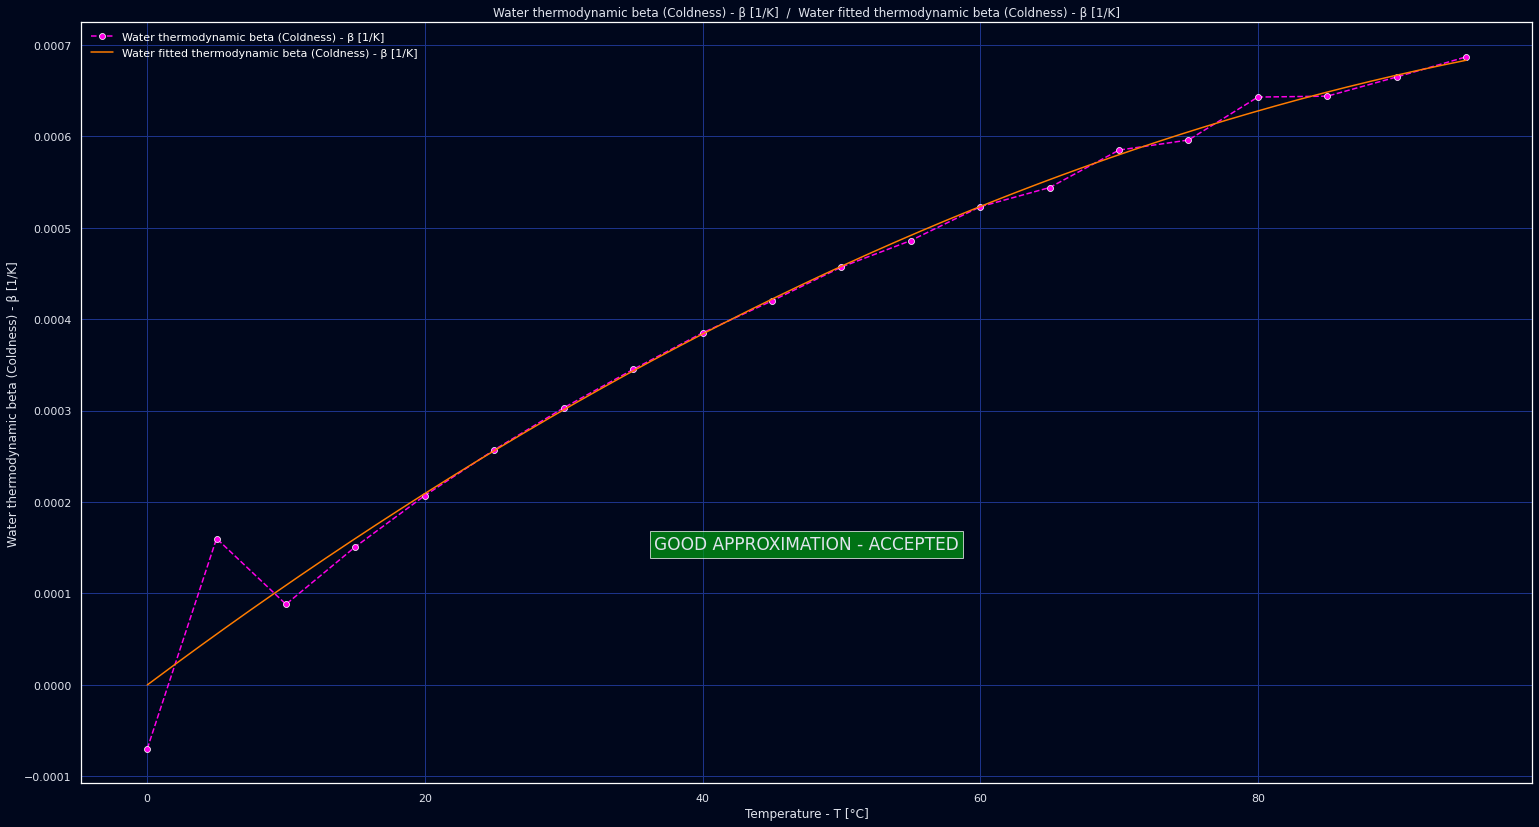

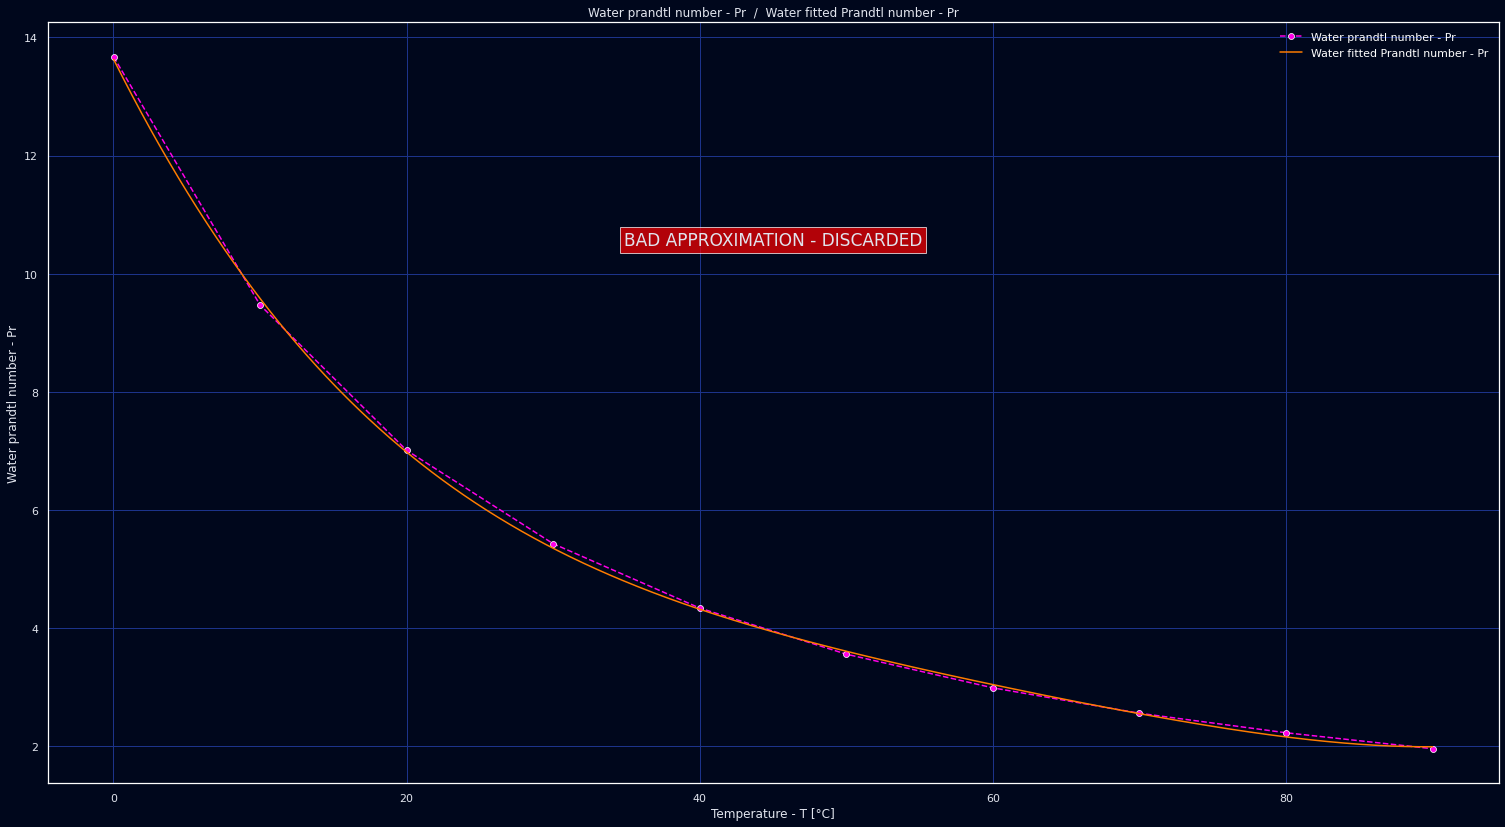

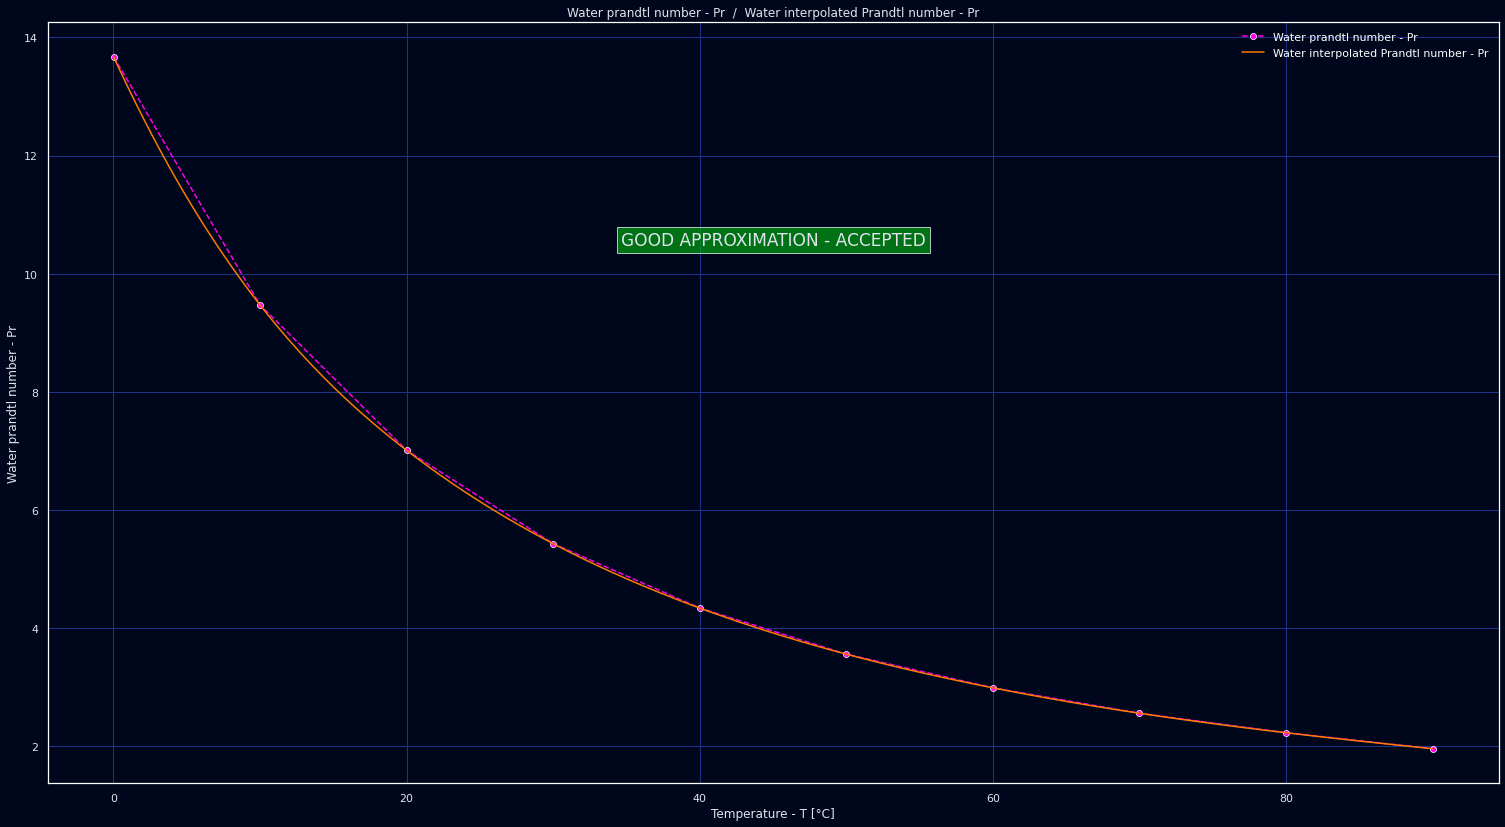

<Figure size 1872x1008 with 0 Axes>

In [37]:
f_water_rho, f_water_cp, f_water_lambda, f_water_ni, f_water_beta, f_water_pr = tv.poly_approx_plot_water_thermophys_vars(water, thermophys_vars_plt_flg)   # Function call

### - AISI-316-stainless-steel's thermophysics variables polynomial approximation

* Function call to apply AISI-316-stainless-steel's thermophysics variables polynomial approximation and plotting vs temperature

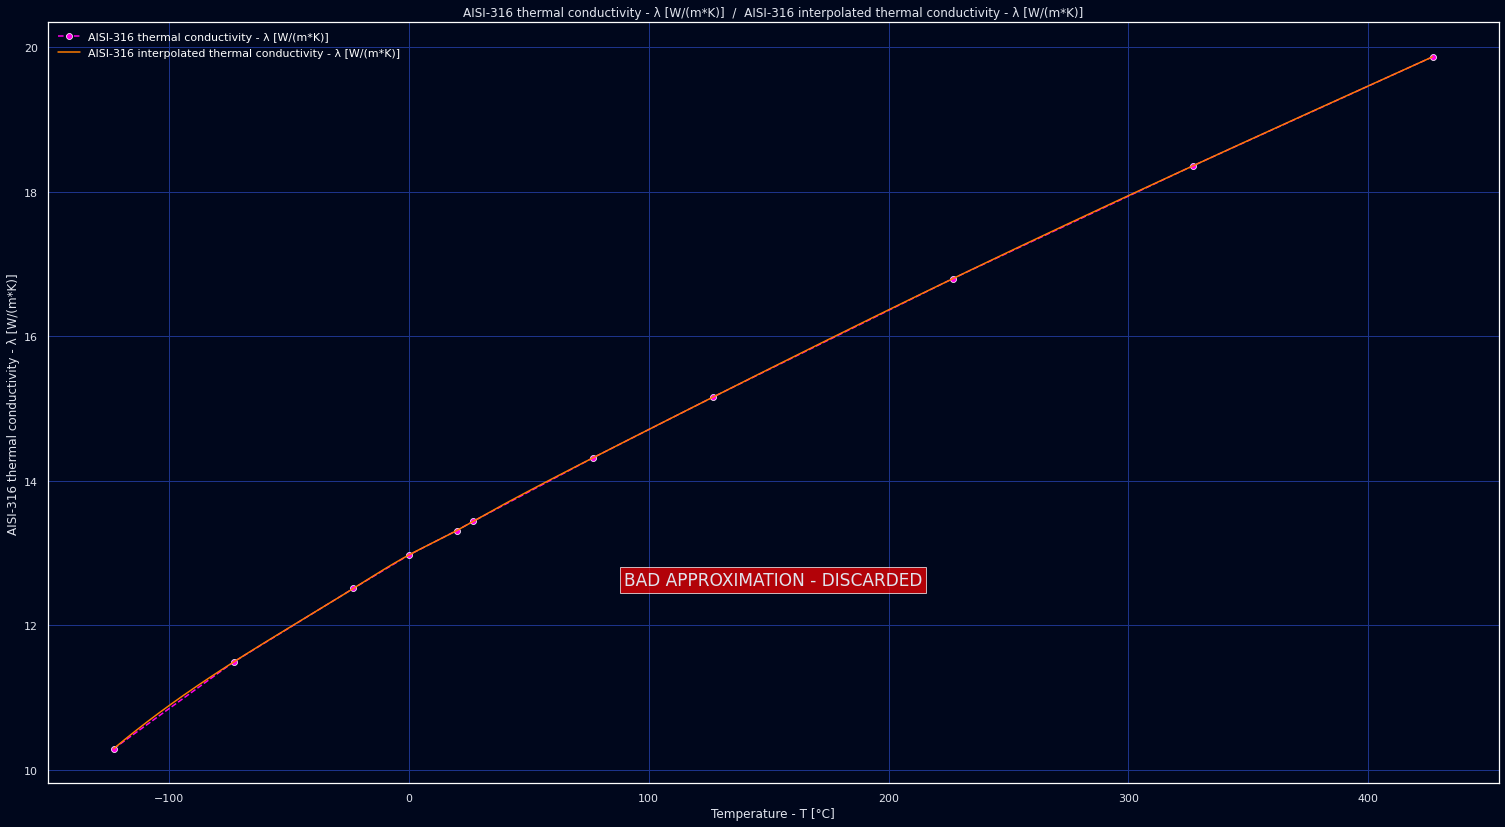

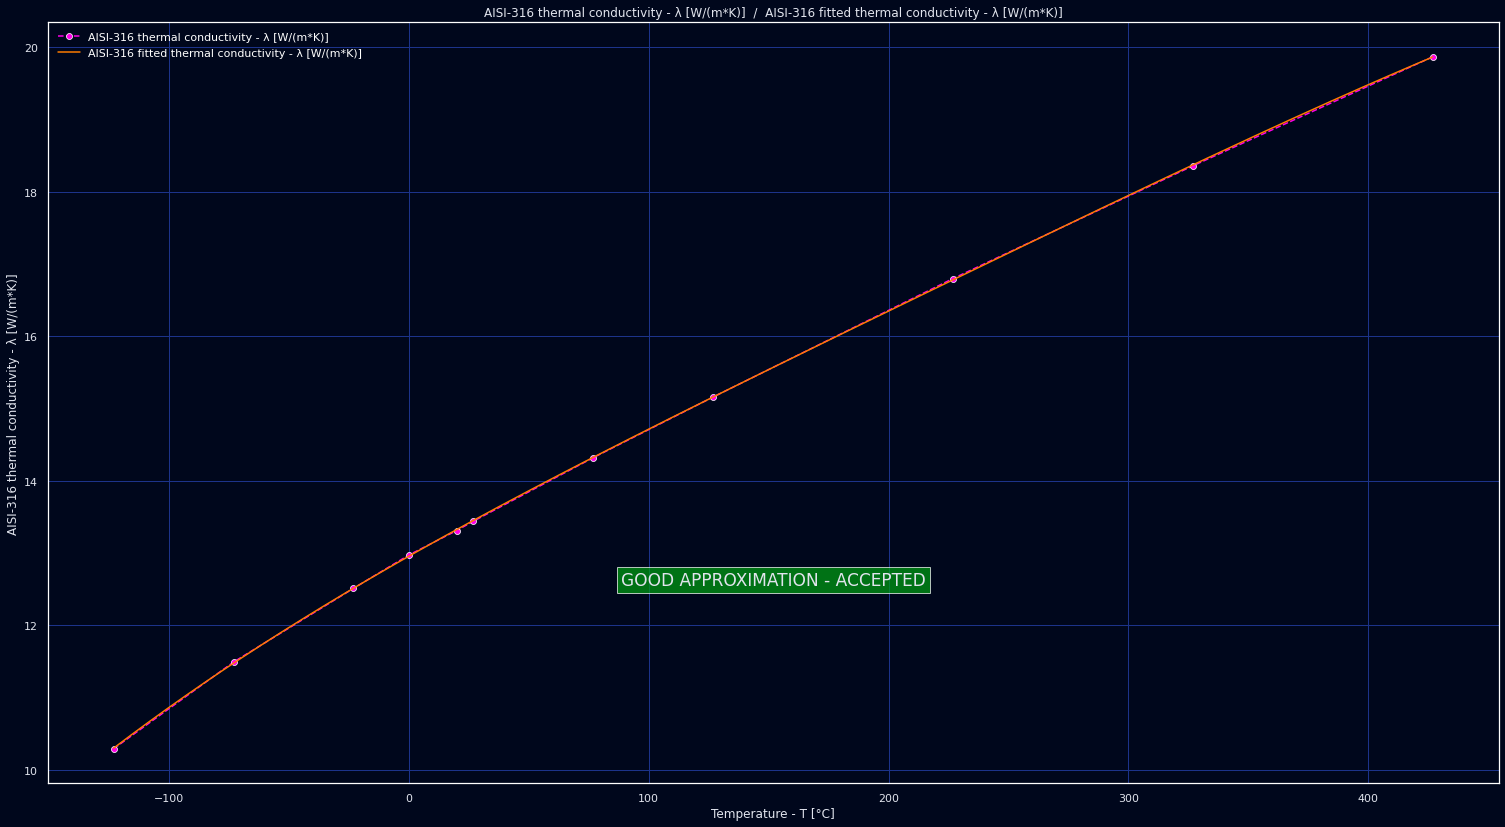

<Figure size 1872x1008 with 0 Axes>

In [38]:
f_aisi_316_lambda = tv.poly_approx_plot_aisi_316_thermophys_vars(aisi_316, thermophys_vars_plt_flg)   # Function call

## Engineering calcs

### - Heat-exchanger object initialization

* Initialize heat-exchanger with defined/calculated geometrical properties

In [39]:
he = ec.He()                # Heat-exchanger object instance creation
he.print_info(he_dbg_flg)   # Print heat-exchanger info (if debug flag is enabled) by callin' the print-info method of the class

--> Heat-exchanger effective length: 0.68 [m]
--> Heat-exchanger glass pipe internal-diameter: 0.05 [m]
--> Heat-exchanger steel pipes internal-diameter: 0.008 [m]
--> Heat-exchanger steel pipes external-diameter: 0.01 [m]
--> Number of heat-exchanger steel pipes: 5
--> Heat-exchanger steel pipes thickness: 0.002 [m]
--> Heat-exchanger steel pipes internal-surface: 0.08545132017764238 [m^2]
--> Heat-exchanger steel pipes external-surface: 0.10681415022205297 [m^2]


### - Experimental data conversions and pre-calcs operations

* Volume flow rates [l/h] conversion into mass flow rates [kg/s] using fluids density value at inlet fluid temperature

In [40]:
for meas in measures:                                                           # Measures scrollin' cycle
  meas.f1 = ec.vol_flow_rate_to_mass_flow_rate(meas.f1, f_water_rho(meas.t1))   # Measure cold fluid vol flow rate [l/h] conv into mass flow rate [kg/s]
  meas.f2 = ec.vol_flow_rate_to_mass_flow_rate(meas.f2, f_water_rho(meas.t2))   # Measure hot fluid vol flow rate [l/h] conv into mass flow rate [kg/s]

* Average fluid-temperatures calculation

In [41]:
for meas in measures:                                 # Measures scrollin' cycle
  meas.avg_cold_fl_temp = ec.avg(meas.t1, meas.t3)    # Measure avg cold fluid temp calc
  meas.avg_hot_fl_temp = ec.avg(meas.t2, meas.t4)     # Measure avg hot fluid temp calc

* Cold and hot fluids delta temperatures calculations

In [42]:
for meas in measures:                         # Measures scrollin' cycle
  meas.cold_fl_delta_temp = meas.t3-meas.t1   # Measure cold fluid delta-temp calc
  meas.hot_fl_delta_temp = meas.t4-meas.t2    # Measure hot fluid delta-temp calc

* Log-mean temperature difference (LMTDs) calculations

In [43]:
for meas in measures:                                     # Measures scrollin' cycle
  meas.lmtd = ec.lmtd(meas.t2-meas.t1, meas.t4-meas.t3)   # Measure log-mean temperature difference (LMTD)

### - Thermal power exchange and loss

* Thermal power exchanged by fluids [kW] and thermal power losses [kW], calculated using Cp at average fluid temperature

In [44]:
for meas in measures:                                                                                         # Measures scrollin' cycle
  meas.cold_fl_tr_heat = ec.therm_pow(meas.f1, f_water_cp(meas.avg_cold_fl_temp), meas.cold_fl_delta_temp)    # Measure cold fluid transferred heat [kW]
  meas.hot_fl_tr_heat = ec.therm_pow(meas.f2, f_water_cp(meas.avg_hot_fl_temp), meas.hot_fl_delta_temp)       # Measure hot fluid transferred heat [kW]
  meas.heat_loss = meas.hot_fl_tr_heat+meas.cold_fl_tr_heat                                                   # Measure heat losses [kW]

### - Global heat transfer coefficients (global HTCs)

* External global heat transfer coefficients (external global HTCs) calculation

In [45]:
for meas in measures:                                                                       # Measures scrollin' cycle
  meas.glob_htc = ec.glob_htc_coeff(meas.hot_fl_tr_heat, he.steel_pipes_es_m2, meas.lmtd)   # Measure global heat transfer coefficient (global HTC) [kW/(m^2*K)]

### - Measures and calcs results ## LAST ##

* Print measures calculations results

In [46]:
ec.print_measures_calcs_res(measures, meas_calcs_dbg_flg)   # Function call to print measures calcs results


--> Cocurrent measure 1 measure calculations results:
- Cold fluid mass flow rate: 0.1498469840803731 [kg/s]
- Hot fluid mass flow rate: 0.15429849930385225 [kg/s]
- Cold fluid inlet temperature: 15.254444444444452 [°C]
- Hot fluid inlet temperature: 51.24088888888886 [°C]
- Cold fluid outlet temperature: 24.349777777777817 [°C]
- Hot fluid outlet temperature: 41.90299999999992 [°C]
- Average cold fluid temperature: 19.802111111111135 [°C]
- Average hot fluid temperature: 46.57194444444439 [°C]
- Cold fluid delta temperature: 9.095333333333365 [°C]
- Hot fluid delta temperature: -9.33788888888894 [°C]
- Log-mean temperature difference (LMTD): 25.67641629916658 [°C]
- Cold fluid transferred heat (thermal power): 5.700996970190151 [kW]
- Hot fluid transferred heat (thermal power): -6.023372300191799 [kW]
- Heat loss (thermal power): -0.3223753300016474 [kW]
- Global heat transfer coefficient (global HTC): -2.1962233736173937 [kW/(m^2*K)]

--> Countercurrent measure 1 measure calculation